In [1]:
'''
!ls
!pip install info_gain
'''

Variables:
PassengerID - A column added by Kaggle to identify each row and make submissions easier

Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)

Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)

Sex - The passenger's sex

Age - The passenger's age in years

SibSp - The number of siblings or spouses the passenger had aboard the Titanic

Parch - The number of parents or children the passenger had aboard the Titanic

Ticket - The passenger's ticket number

Fare - The fare the passenger paid

Cabin - The passenger's cabin number

Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)


Final variables:

Pclass
Title (from Name)
Age
Family (SibSp + Parch)
Embarked_C

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import minmax_scale
from info_gain import info_gain

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width=None

In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
holdout = pd.read_csv("test.csv")
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Treates missing values.
round(train['Survived'].sum()/len(train), 4)

0.3838

In [8]:
print(train.isnull().sum())
print()
print(train.isnull().sum() / len(train))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [9]:
#Variables with missing: Age, Cabin, Embarked
train["Age"] = train["Age"].fillna(-1.0) 

In [10]:
train['Cabin'] = train['Cabin'].fillna('Unknown')
train['Deck'] = train['Cabin'].str.get(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,U


In [11]:
display(train[train['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [12]:
#Google says they embarked in S (https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)
train["Embarked"] = train["Embarked"].fillna("S")

In [13]:
#Correct these variables in holdout
holdout["Age"] = holdout["Age"].fillna(-1.0) 
holdout['Cabin'] = holdout['Cabin'].fillna('Unknown')
holdout['Deck'] = holdout['Cabin'].str.get(0)
holdout["Embarked"] = holdout["Embarked"].fillna("S")

In [14]:
#Variable Name 
#They all performance the same. Therefore,  process_Titles_2 is better because it is simplier)
def process_Titles_1(df):
    """Extract and categorize the title from the name column. 

    Usage
    ------

    train = process_Titles_1(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title_1"] = extracted_titles.map(titles)
    return df


def process_Titles_2(df):
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs_Miss",
        "Ms":          "Mrs_Miss",
        "Mrs" :        "Mrs_Miss",
        "Master" :     "Master_Royalty",
        "Mlle":        "Mrs_Miss",
        "Miss" :       "Mrs_Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Master_Royalty",
        "Don":         "Master_Royalty",
        "Sir" :        "Master_Royalty",
        "Countess":    "Master_Royalty",
        "Dona":        "Master_Royalty",
        "Lady" :       "Master_Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title_2"] = extracted_titles.map(titles)
    return df

In [15]:
def graf_ig(variable):
    """Plot survived and nor survived per category. 
    Caculate the information gain.

    Usage
    ------

    graf_ig(variable)
    """
    fig, axs = plt.subplots(figsize=(20, 10))
    sns.countplot(x = variable, hue = 'Survived', data = train)

    plt.xlabel(variable, size = 15, labelpad = 20)
    plt.ylabel('Passenger Count', size = 15, labelpad = 20)
    plt.tick_params(axis = 'x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    plt.xticks(rotation=45)

    plt.legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size': 15})
    plt.title('Survival Counts in {} Feature'.format(variable), size = 15, y = 1.05)

    plt.show()

    age_ig = info_gain.info_gain(train['Survived'], train[variable])
    print(age_ig)

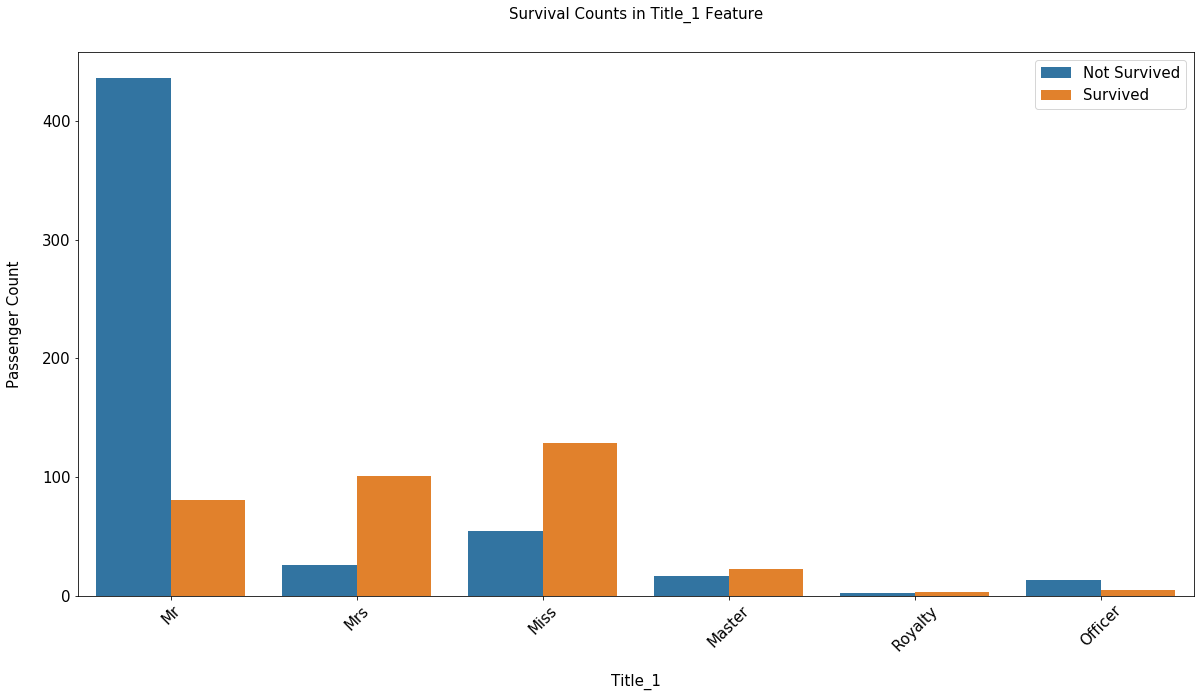

0.16948851510950763


In [16]:
train = process_Titles_1(train)
graf_ig('Title_1')

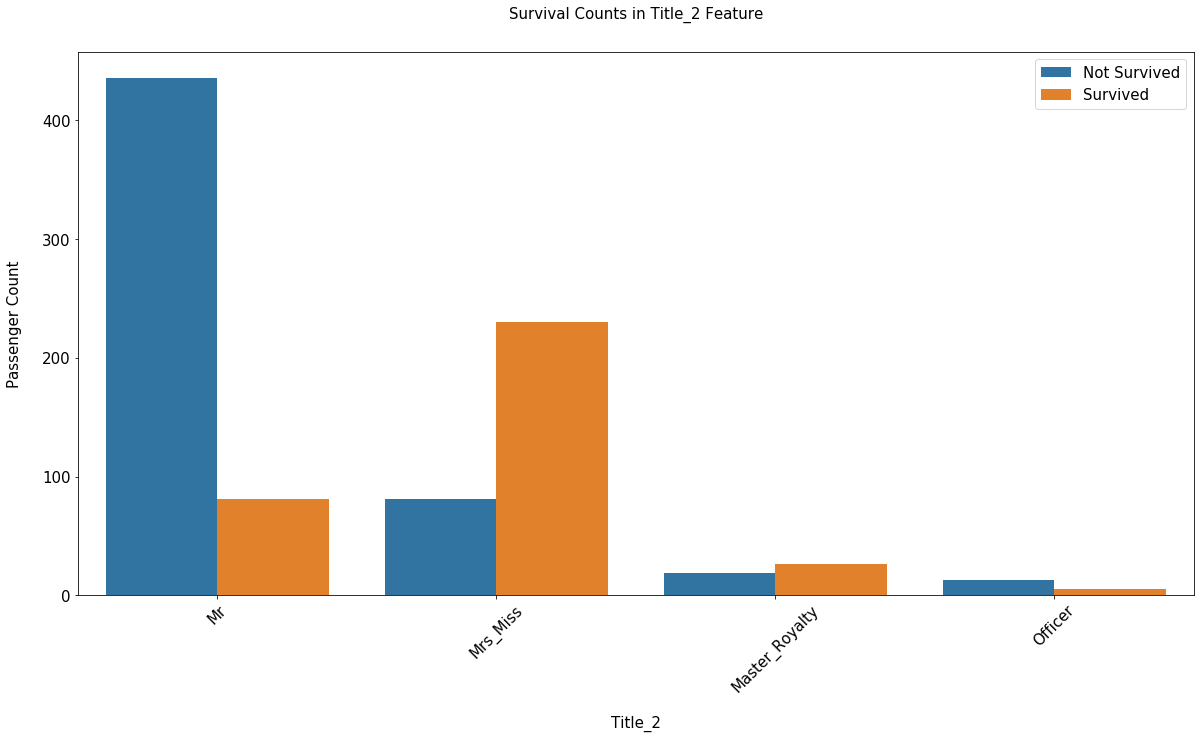

0.1675024769172762


In [17]:
train = process_Titles_2(train)
graf_ig('Title_2')

In [18]:
holdout = process_Titles_2(holdout)

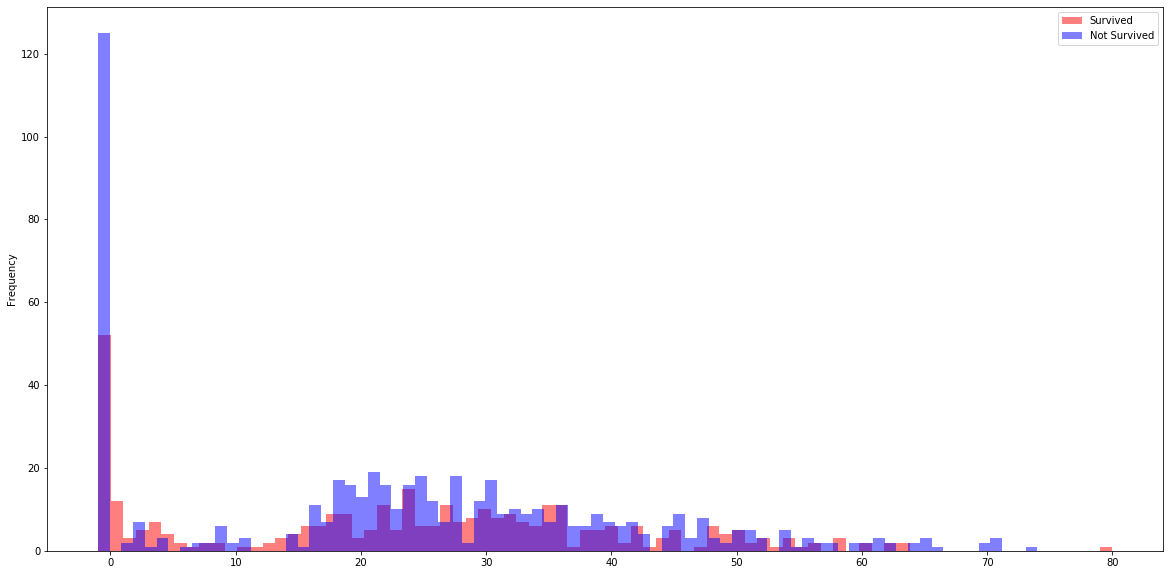

In [19]:
#Variable Age
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]

fig = plt.figure(figsize = (20, 10))
survived["Age"].plot.hist(alpha=0.5,color='red',bins=80)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=80)
plt.legend(['Survived', 'Not Survived'])
plt.show()

In [20]:
#Classifies the variable Age (Best one: process_Age_2)
def process_Age_1(df):
    """Process the Age column into pre-defined 'bins'.

    Usage
    ------

    train = process_age_1(train)
    """
    cut_points = [-2,0,5,12,18,35,60,100]
    label_names = ["Missing","A_1","A_2","A_3","A_4","A_5","A_6"]
    df["Age_categories_1"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df


def process_Age_2(df):
    cut_points = [-2,0,5,18,60,100]
    label_names = ["Missing","A_1","A_2","A_3","A_4"]
    df["Age_categories_2"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

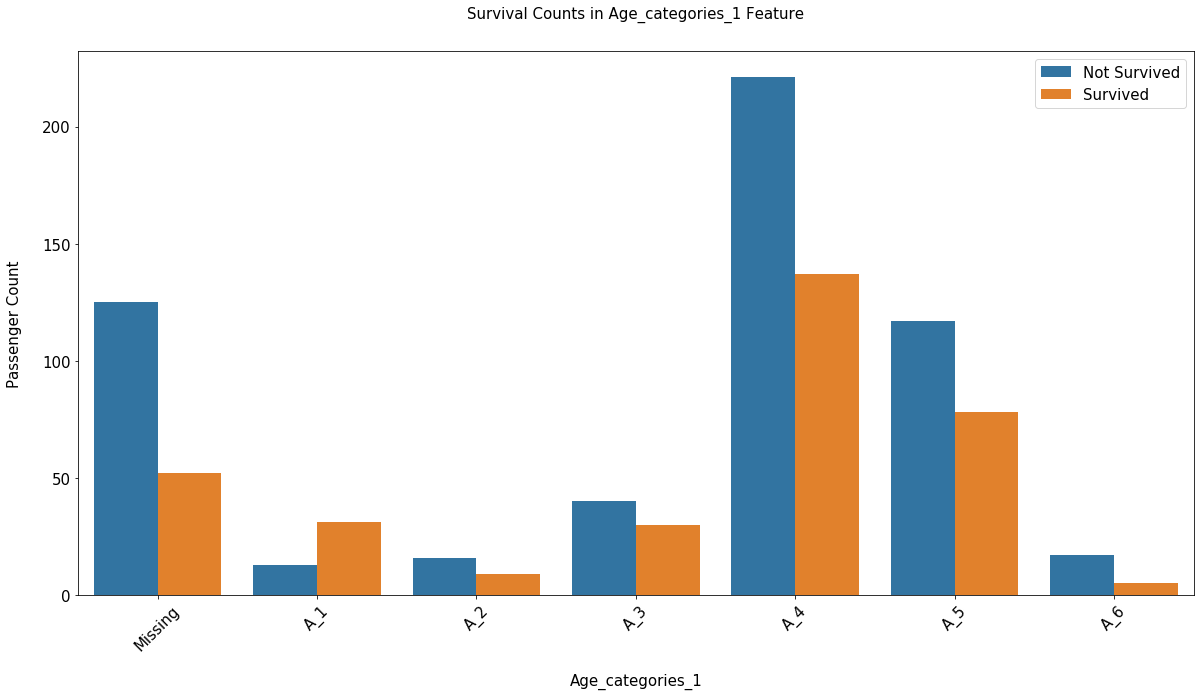

0.015802106939872385


In [21]:
train = process_Age_1(train)
graf_ig('Age_categories_1')

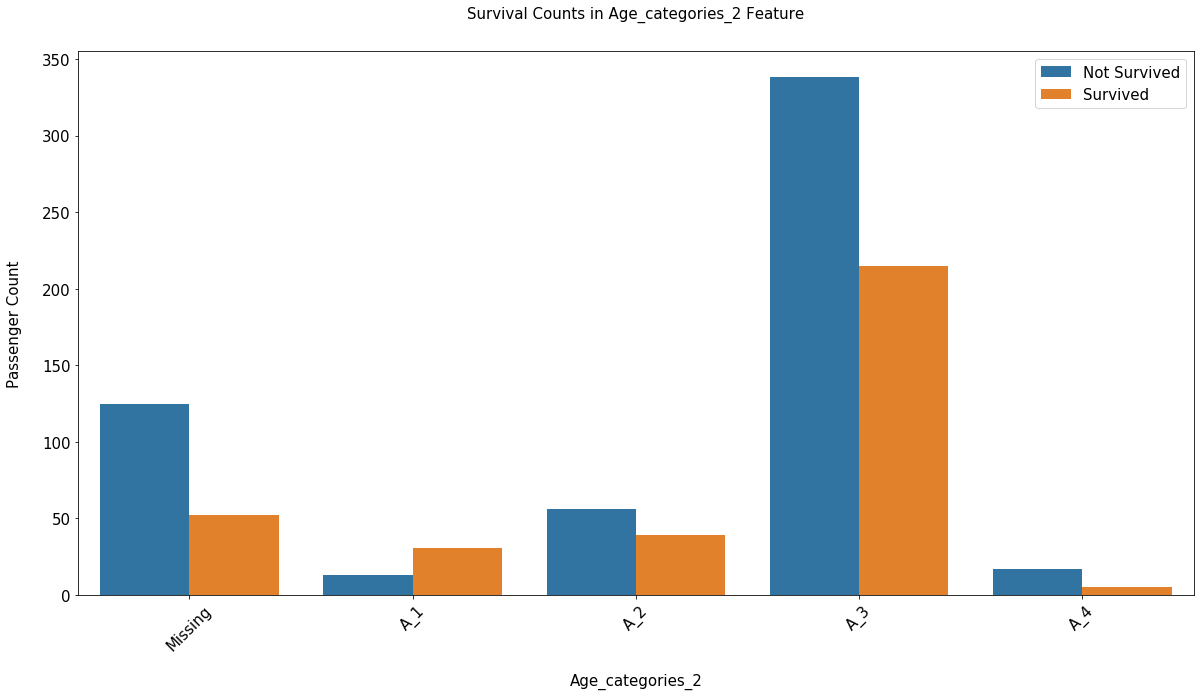

0.015510042495747611


In [22]:
train = process_Age_2(train)
graf_ig('Age_categories_2')

In [23]:
holdout = process_Age_2(holdout)

In [24]:
#Varibles: SibSp and Parch
train['SibSp'].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [25]:
train['Parch'].value_counts().sort_index()    

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

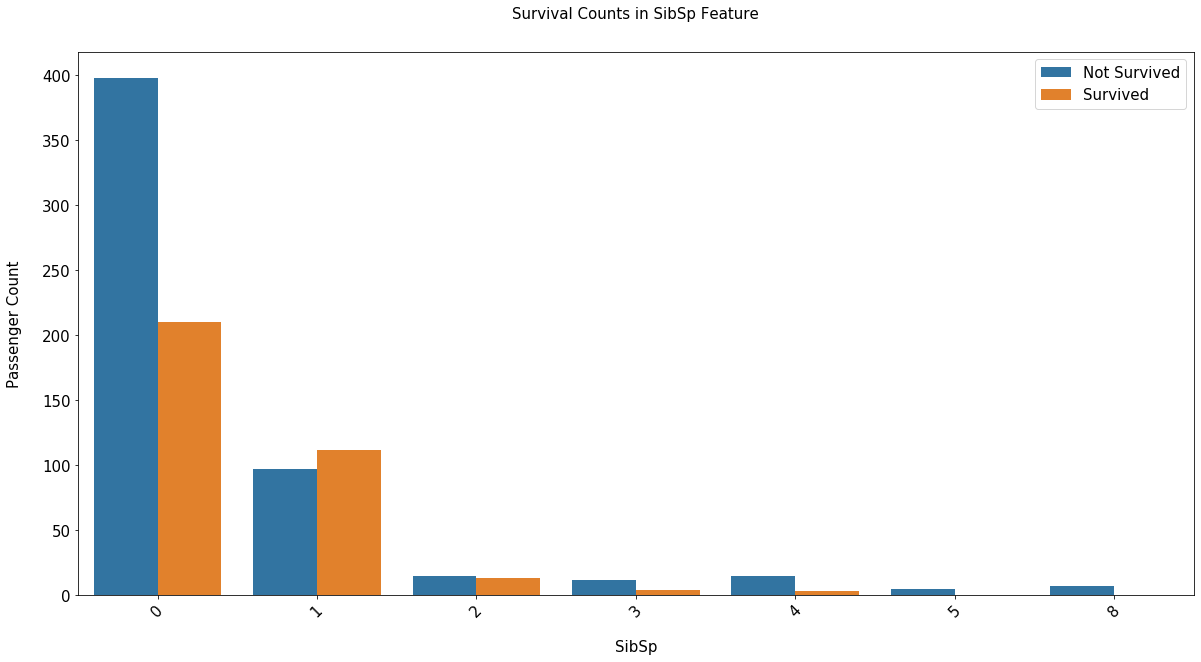

0.02319708627963979


In [26]:
graf_ig('SibSp')

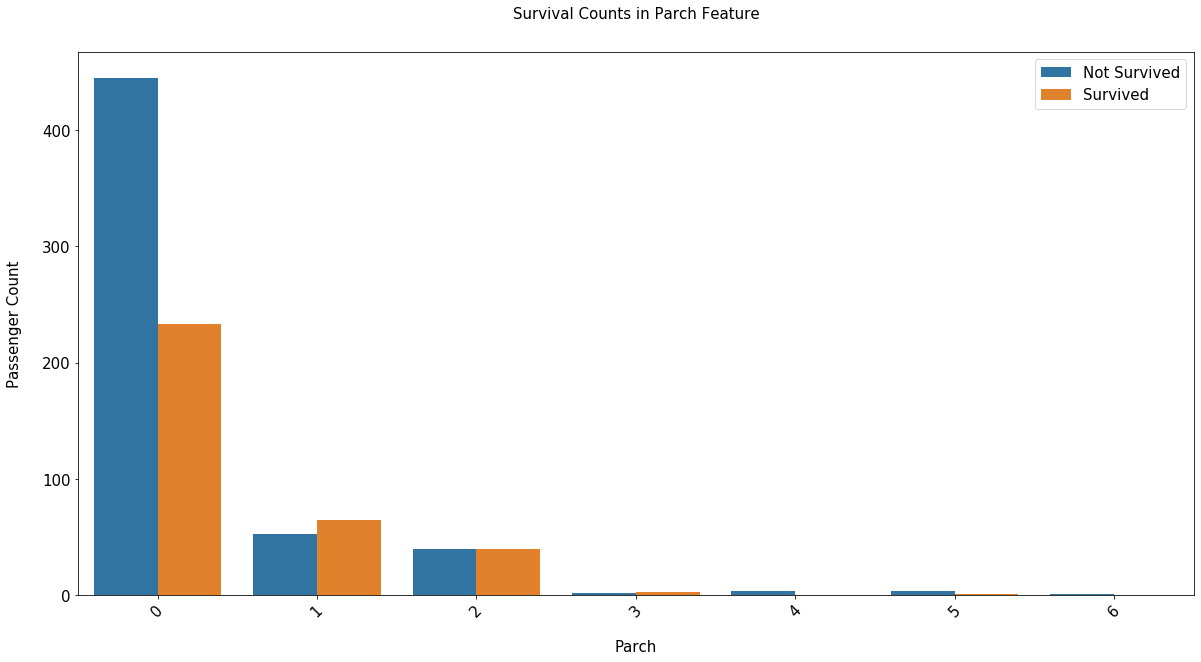

0.016365584523616472


In [27]:
graf_ig('Parch')

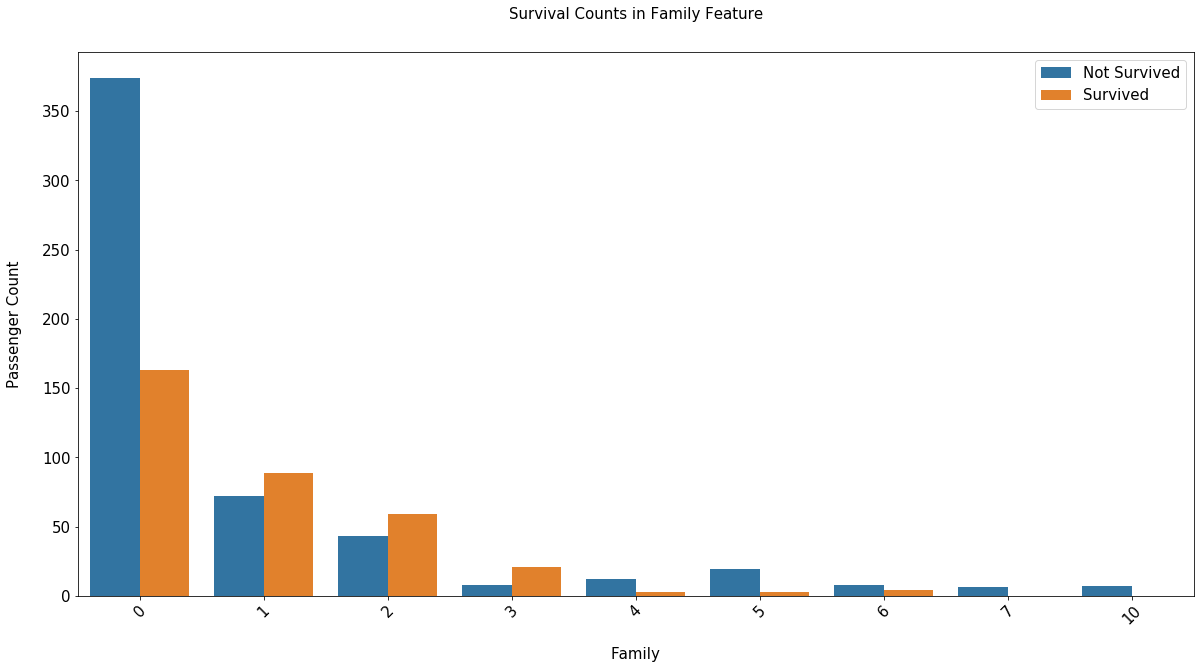

0.047781241446019695


In [28]:
train['Family'] = train[["SibSp","Parch"]].sum(axis=1)
graf_ig('Family')

In [29]:
holdout['Family'] = holdout[["SibSp","Parch"]].sum(axis=1)

In [30]:
#Classifies the variable Family (Best one: process_Family_2)
def process_Family_1(df):
    """Process the Family column into pre-defined 'bins'.

    Usage
    ------

    train = process_age_1(train)
    """
    cut_points = [-1, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 100]
    label_names = ["F_0", "F_1", "F_2", "F_3", "F_4", "F_5", "F_6", "F_7", "F_8+"]
    df["Family_categories_1"] = pd.cut(df["Family"],cut_points,labels=label_names)
    return df

def process_Family_2(df):
    cut_points = [-1, 0.5, 2.5, 3.5, 6.5, 100]
    label_names = ["F_0", "F_1_2", "F_3", "F_4_5_6", "F_7+"]
    df["Family_categories_2"] = pd.cut(df["Family"],cut_points,labels=label_names)
    return df

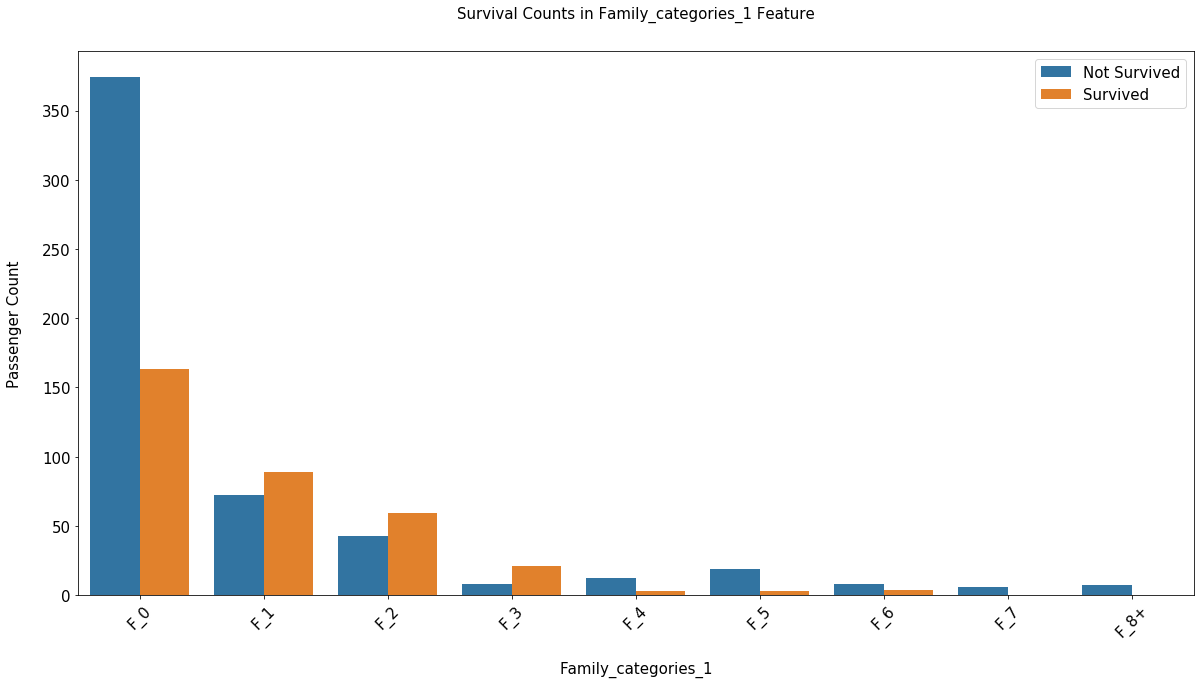

0.047781241446019695


In [31]:
train = process_Family_1(train)
graf_ig('Family_categories_1')

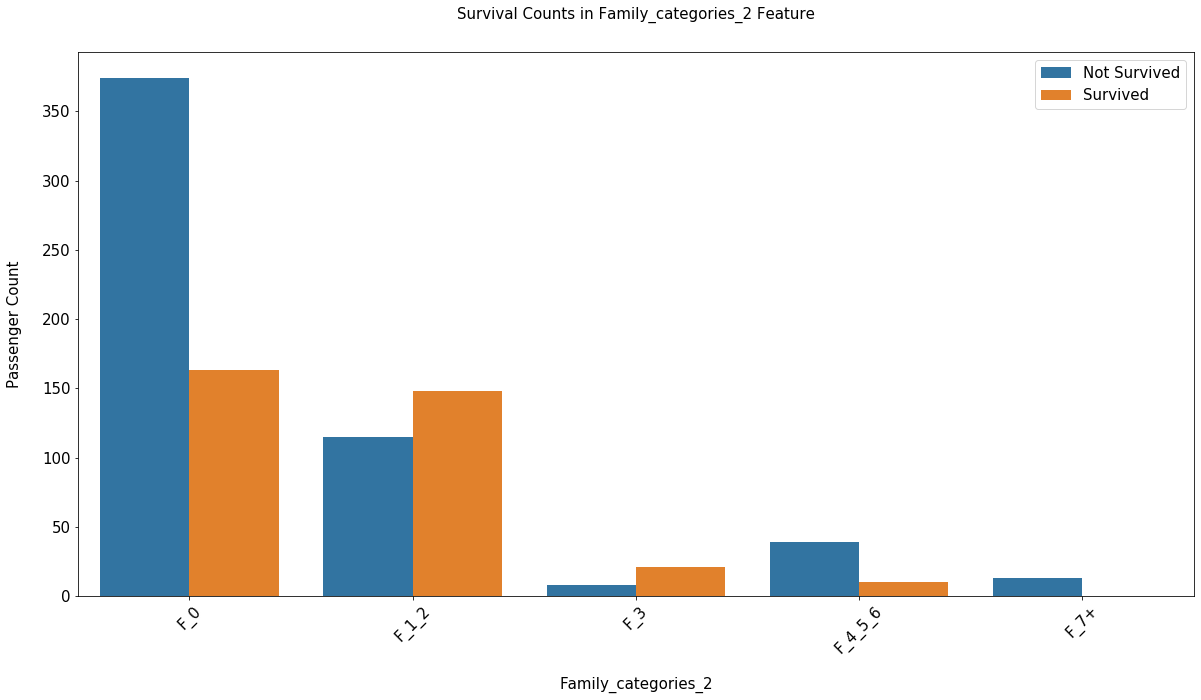

0.04669150215413487


In [32]:
train = process_Family_2(train)
graf_ig('Family_categories_2')

In [33]:
holdout = process_Family_2(holdout)

In [34]:
#Classifies the variable Fare (Best one: process_Fare_2)
def process_Fare_1(df):
    """Process the Age column into pre-defined 'bins'.

    Usage
    ------

    train = process_Fare_1(train)
    """
    cut_points = [0,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories_1"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_Fare_2(df):
    cut_points = [0,12,50,1000]
    label_names = ["0-12","12-50","50+"]
    df["Fare_categories_2"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

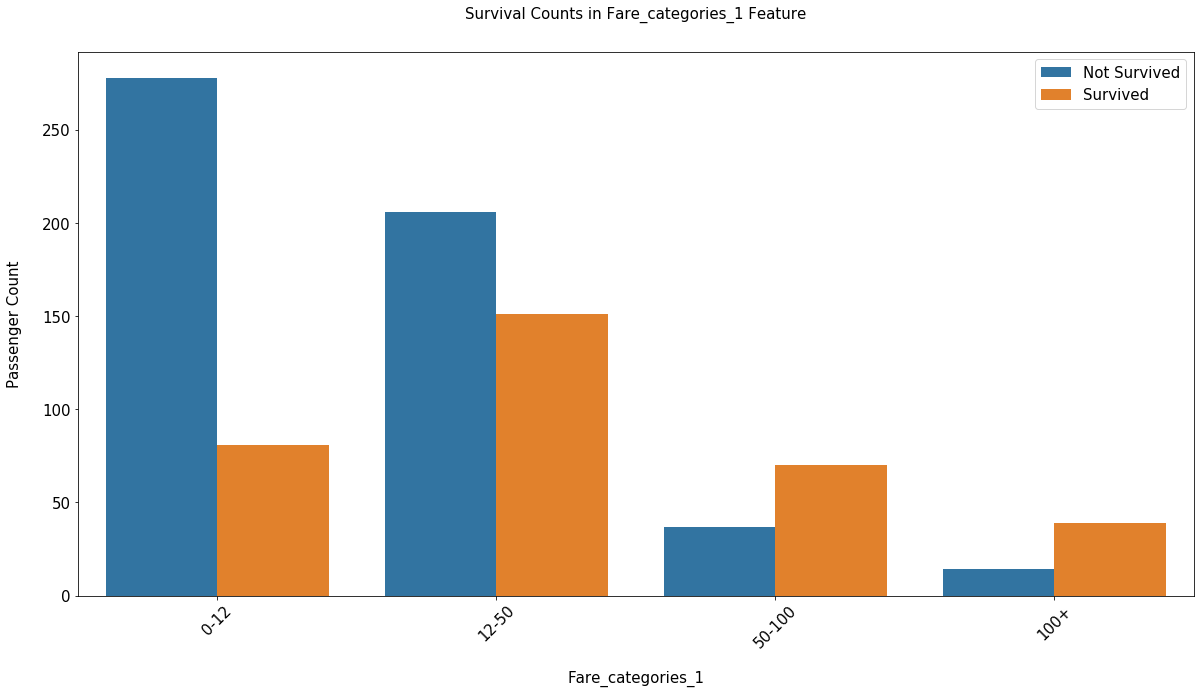

0.06192613190937346


In [35]:
train = process_Fare_1(train)
graf_ig('Fare_categories_1')

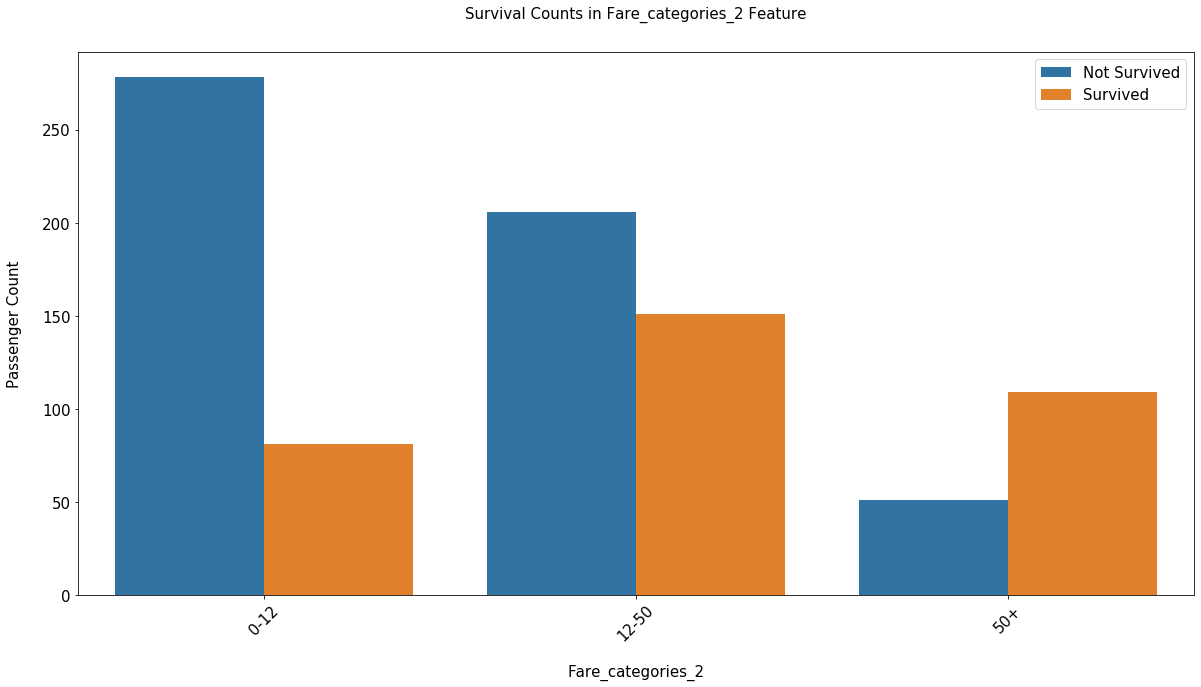

0.06130439922164077


In [36]:
train = process_Fare_2(train)
graf_ig('Fare_categories_2')

In [37]:
holdout = process_Fare_2(holdout)

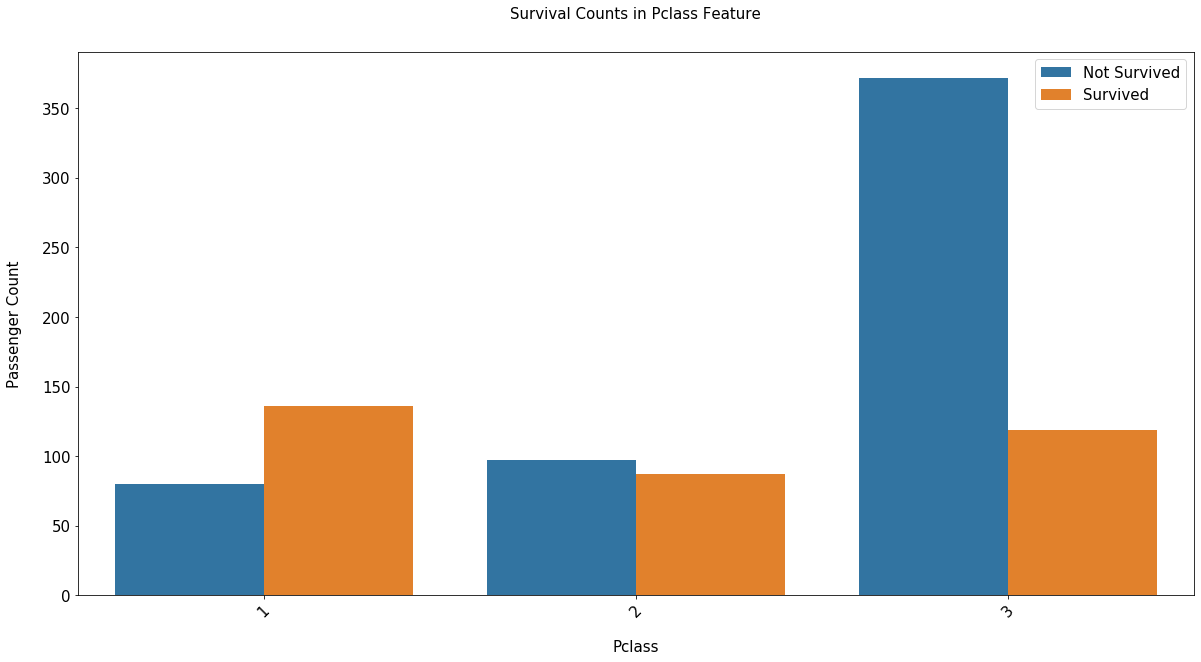

0.058107252690323574


In [38]:
#Calculates information gain.
graf_ig('Pclass')

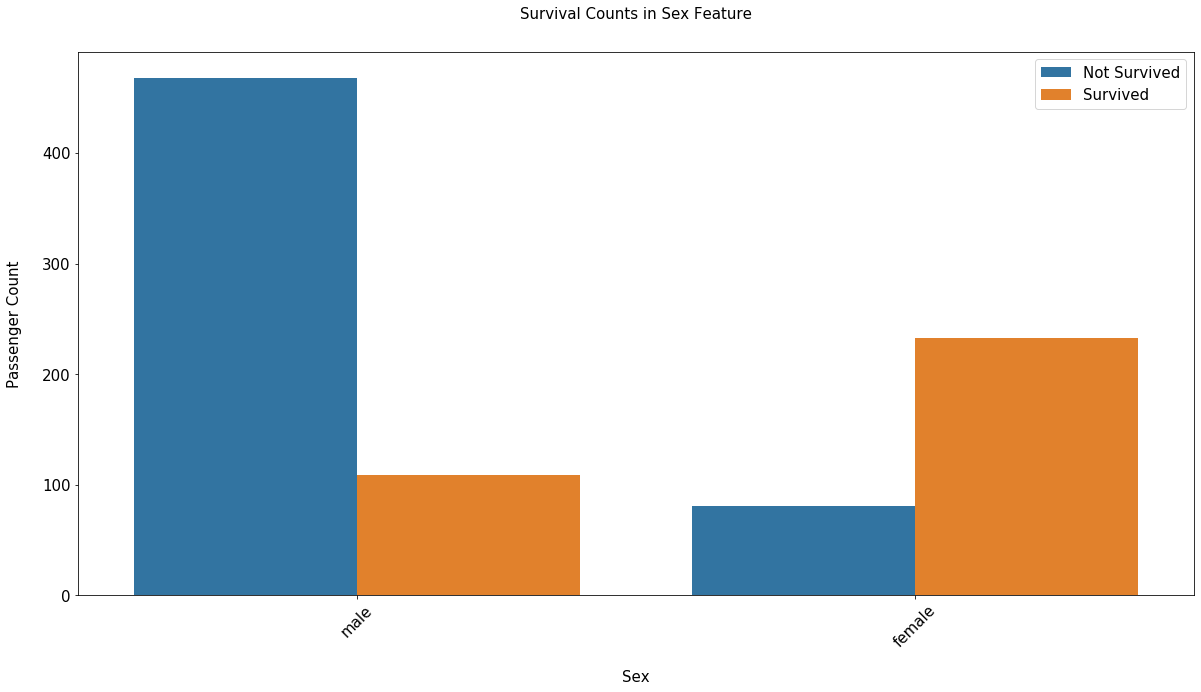

0.15087048925218172


In [39]:
graf_ig('Sex')

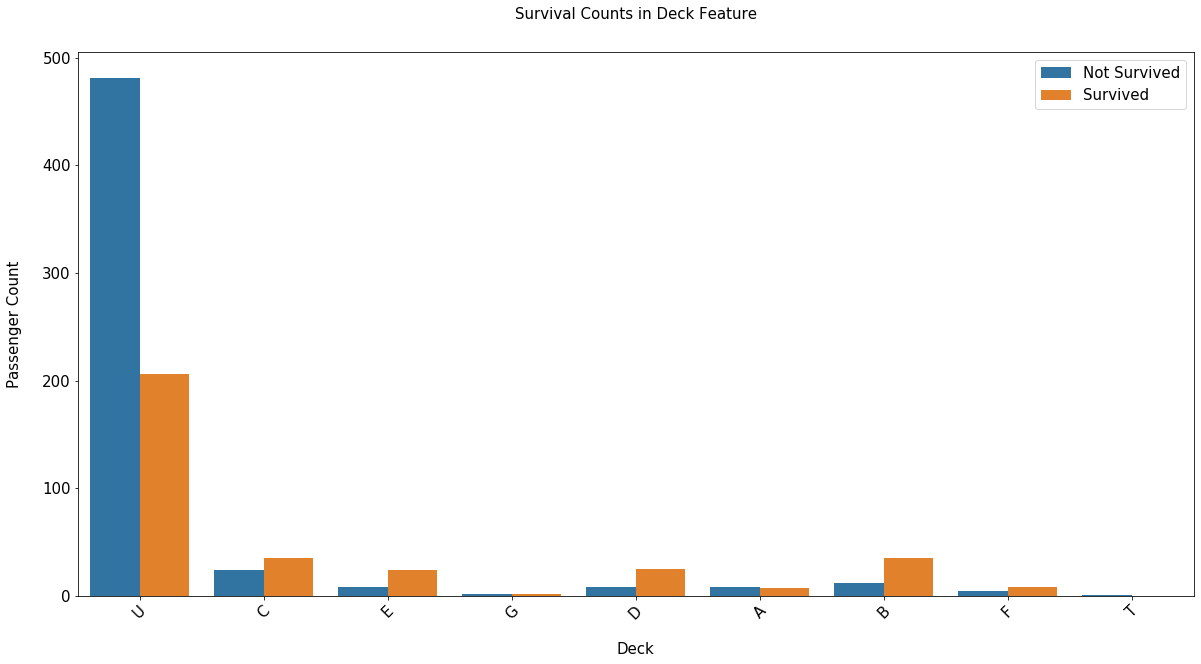

0.05512159662400029


In [40]:
graf_ig('Deck')

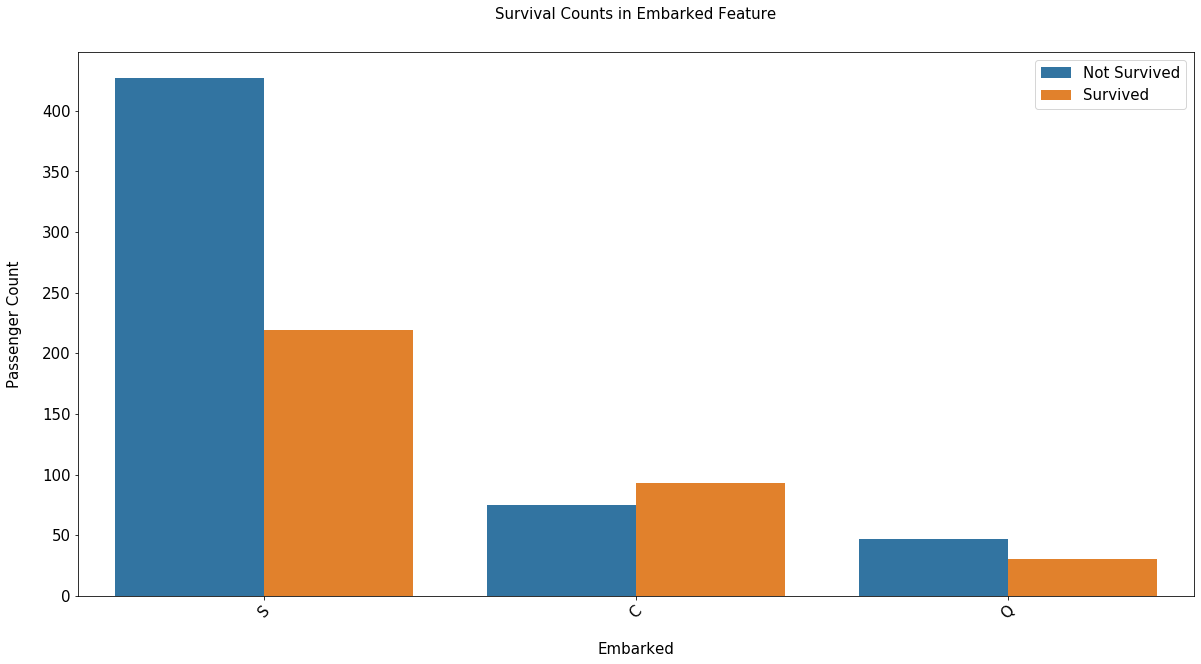

0.014233249756964939


In [41]:
graf_ig('Embarked')

Pclass         891 non-null int64    - ig Pclass = 0.058107252690323574

Name           891 non-null object   - ig Title_2 = 0.16750247691727627

Sex            891 non-null object   - ig Sex = 0.15087048925218172
                                                                   
Age            714 non-null float64  - ig Age_categories_2 = 0.015510042495747611
                                                                   
SibSp          891 non-null int64    - ig Family_categories_2 = 0.04669150215413487

Parch          891 non-null int64    - ig Family_categories_2 = 0.04669150215413487

Ticket         891 non-null object   - I will not use it

Fare           891 non-null float64  - ig Fare_categories_2 = 0.06130439922164077   

Cabin          204 non-null object   - ig Deck = 0.05512159662400029

Embarked       889 non-null object   - ig Embarked = 0.014233249756964939

In [42]:
#Makes new variables.
train["Pclass_Title"] = train['Pclass'].astype(str).str.cat(train['Title_2'].astype(str), sep =" - ")
train["Age_categories_Deck"] = train['Age_categories_2'].astype(str).str.cat(train['Deck'].astype(str), sep =" - ")

holdout["Pclass_Title"] = holdout['Pclass'].astype(str).str.cat(holdout['Title_2'].astype(str), sep =" - ")
holdout["Age_categories_Deck"] = holdout['Age_categories_2'].astype(str).str.cat(holdout['Deck'].astype(str), sep =" - ")

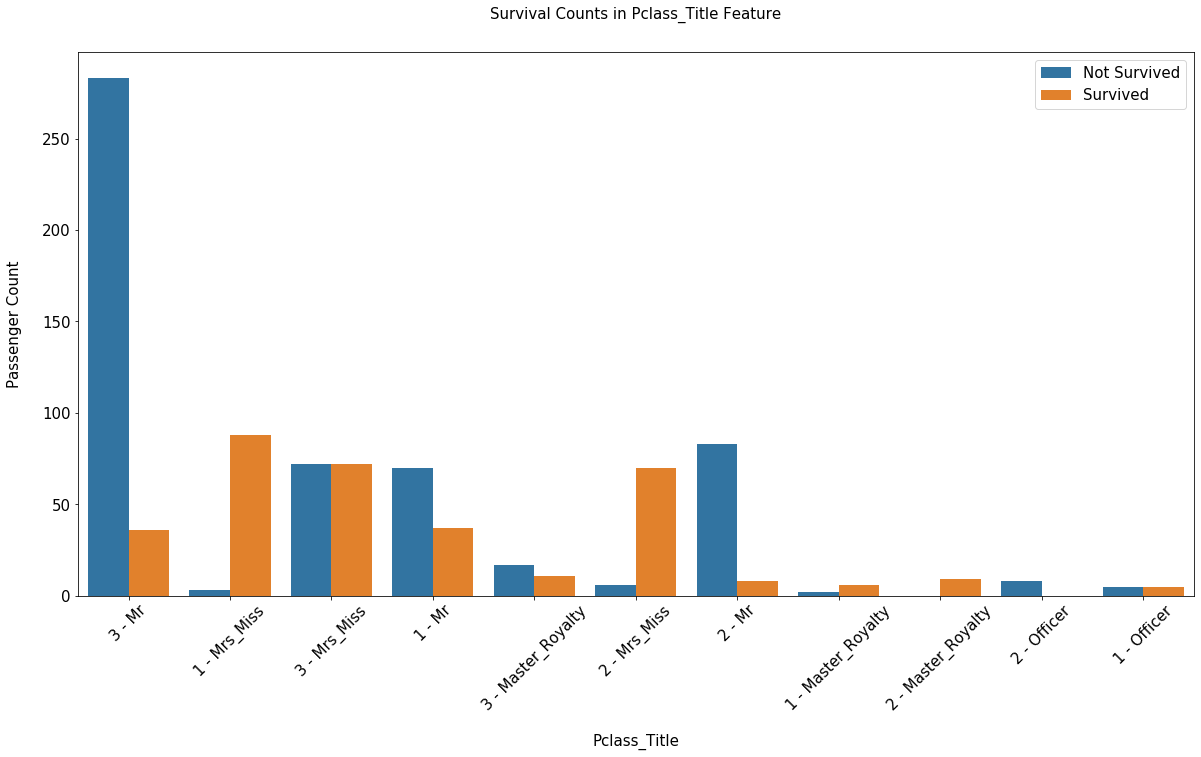

0.247627323791913


In [43]:
graf_ig('Pclass_Title')

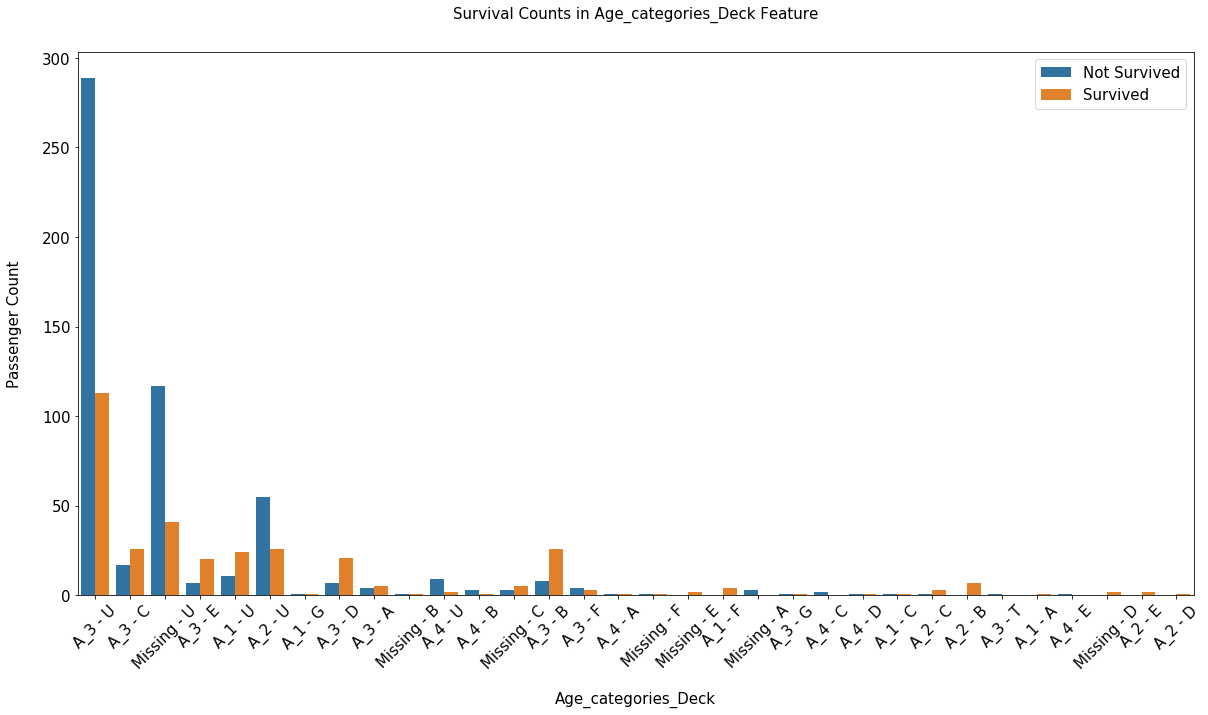

0.08662820309103869


In [44]:
graf_ig('Age_categories_Deck')

In [45]:
#Drops useless columns
columns_to_keep_Train = ['PassengerId', 'Survived', 'Sex', 'Pclass_Title', 'Age_categories_Deck'
                   , 'Family_categories_2', 'Fare_categories_2', 'Embarked']
train = train[columns_to_keep_Train]
train.head()

,PassengerId,Survived,Sex,Pclass_Title,Age_categories_Deck,Family_categories_2,Fare_categories_2,Embarked
0,1,0,male,3 - Mr,A_3 - U,F_1_2,0-12,S
1,2,1,female,1 - Mrs_Miss,A_3 - C,F_1_2,50+,C
2,3,1,female,3 - Mrs_Miss,A_3 - U,F_0,0-12,S
3,4,1,female,1 - Mrs_Miss,A_3 - C,F_1_2,50+,S
4,5,0,male,3 - Mr,A_3 - U,F_0,0-12,S


In [46]:
columns_to_keep_Holdout = ['PassengerId', 'Sex', 'Pclass_Title', 'Age_categories_Deck'
                   , 'Family_categories_2', 'Fare_categories_2', 'Embarked']
holdout = holdout[columns_to_keep_Holdout]
holdout.head()

,PassengerId,Sex,Pclass_Title,Age_categories_Deck,Family_categories_2,Fare_categories_2,Embarked
0,892,male,3 - Mr,A_3 - U,F_0,0-12,Q
1,893,female,3 - Mrs_Miss,A_3 - U,F_1_2,0-12,S
2,894,male,2 - Mr,A_4 - U,F_0,0-12,Q
3,895,male,3 - Mr,A_3 - U,F_0,0-12,S
4,896,female,3 - Mrs_Miss,A_3 - U,F_1_2,12-50,S


In [47]:
#Creates dummies
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummies], axis = 1)
    return df

columns = ['Sex', 'Pclass_Title', 'Age_categories_Deck'
                   , 'Family_categories_2', 'Fare_categories_2', 'Embarked']

for col in columns:
    train = create_dummies(train, col)

for col in columns:
    holdout = create_dummies(holdout, col)

In [48]:
#Verify correlation.
corrmat = train.corr()
sorted_corrs = corrmat['Survived'].abs().sort_values(ascending = False)
display(sorted_corrs)

Survived                           1.000000
Sex_female                         0.543351
Sex_male                           0.543351
Pclass_Title_3 - Mr                0.416123
Pclass_Title_1 - Mrs_Miss          0.404453
Pclass_Title_2 - Mrs_Miss          0.337329
Fare_categories_2_50+              0.286113
Fare_categories_2_0-12             0.267244
Family_categories_2_F_1_2          0.238059
Pclass_Title_2 - Mr                0.205229
Family_categories_2_F_0            0.203367
Age_categories_Deck_A_3 - U        0.191555
Embarked_C                         0.168240
Age_categories_Deck_A_3 - B        0.155992
Embarked_S                         0.149683
Age_categories_Deck_A_3 - D        0.135620
Age_categories_Deck_A_3 - E        0.129734
Family_categories_2_F_3            0.128347
Pclass_Title_2 - Master_Royalty    0.127985
Age_categories_Deck_A_1 - U        0.125517
Age_categories_Deck_Missing - U    0.118709
Age_categories_Deck_A_2 - B        0.112745
Pclass_Title_3 - Mrs_Miss       

In [49]:
#Chooses at least one bin from each variable to discard.
def bin_discart(column, size_y = 25, size_x = 20):
    """Print bins of variable.
    Calculates the correlation of each bin with the target variable;
    Plots the heatmap.
    Saves the heatmap.

    Usage
    ------

    bin_discart(column, size_y, size_x)
    """
    cols = [col for col in train.columns if column in col]
    cols.append('Survived')
    print(*cols, sep = '\n')

    corrmat = train[cols].corr()
    sorted_corrs = corrmat['Survived'].abs().sort_values(ascending = False)
    display(sorted_corrs)

    corrmat = train[cols].corr()

    plt.figure(figsize = (size_x, size_y))
    sns.set(font_scale = 1.5)
    
    ax = sns.heatmap(corrmat, annot = True, linewidth = 0.5, cmap='coolwarm')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.tight_layout()
    plt.savefig('Bin_' + column + '.png')
    plt.show()
    

Pclass_Title
Pclass_Title_1 - Master_Royalty
Pclass_Title_1 - Mr
Pclass_Title_1 - Mrs_Miss
Pclass_Title_1 - Officer
Pclass_Title_2 - Master_Royalty
Pclass_Title_2 - Mr
Pclass_Title_2 - Mrs_Miss
Pclass_Title_2 - Officer
Pclass_Title_3 - Master_Royalty
Pclass_Title_3 - Mr
Pclass_Title_3 - Mrs_Miss
Survived


Survived                           1.000000
Pclass_Title_3 - Mr                0.416123
Pclass_Title_1 - Mrs_Miss          0.404453
Pclass_Title_2 - Mrs_Miss          0.337329
Pclass_Title_2 - Mr                0.205229
Pclass_Title_2 - Master_Royalty    0.127985
Pclass_Title_3 - Mrs_Miss          0.104873
Pclass_Title_2 - Officer           0.075126
Pclass_Title_1 - Master_Royalty    0.071666
Pclass_Title_1 - Mr                0.028900
Pclass_Title_1 - Officer           0.025448
Pclass_Title_3 - Master_Royalty    0.003340
Name: Survived, dtype: float64

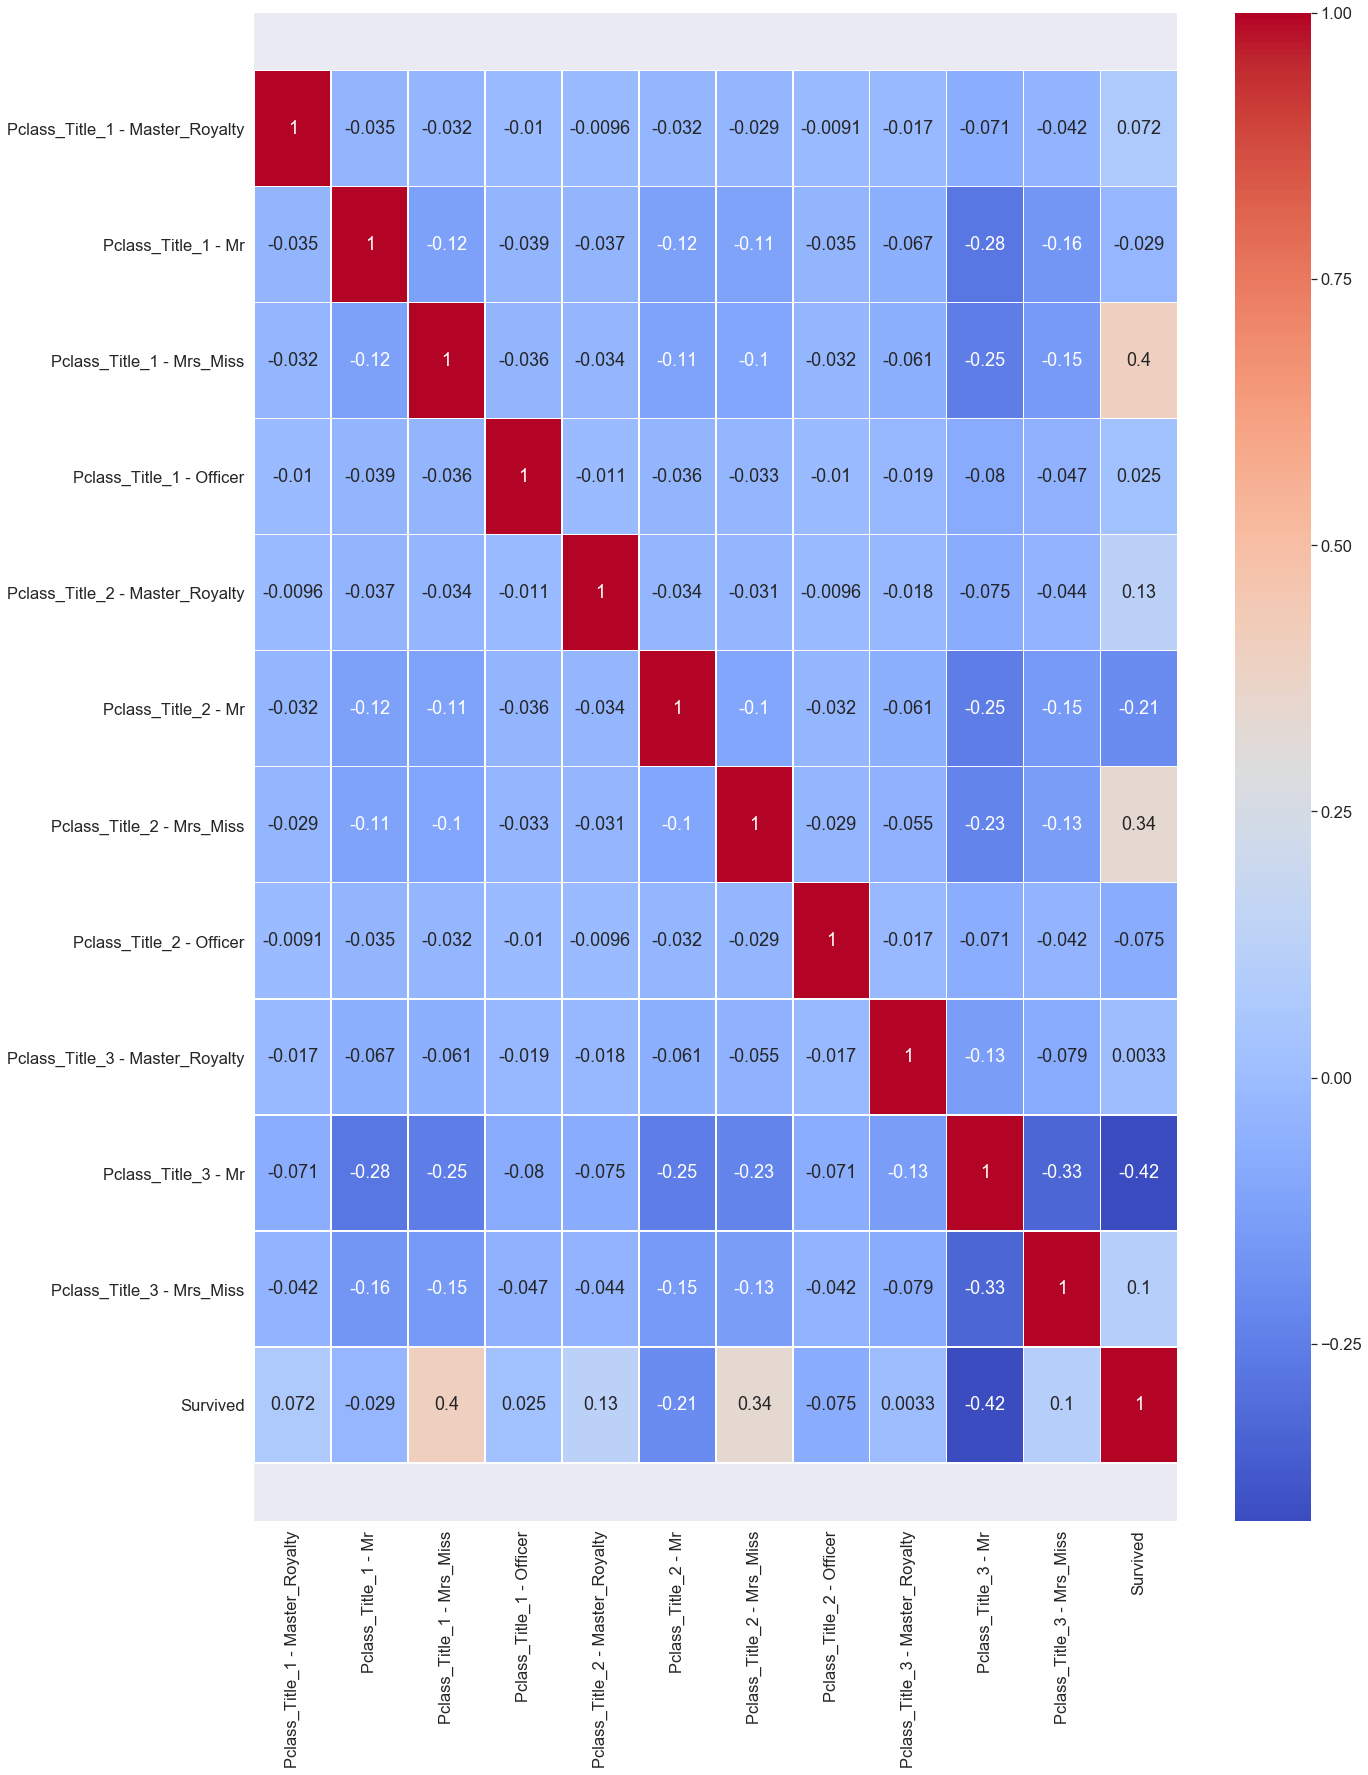

In [50]:
bin_discart('Pclass')

Age_categories_Deck
Age_categories_Deck_A_1 - A
Age_categories_Deck_A_1 - C
Age_categories_Deck_A_1 - F
Age_categories_Deck_A_1 - G
Age_categories_Deck_A_1 - U
Age_categories_Deck_A_2 - B
Age_categories_Deck_A_2 - C
Age_categories_Deck_A_2 - D
Age_categories_Deck_A_2 - E
Age_categories_Deck_A_2 - U
Age_categories_Deck_A_3 - A
Age_categories_Deck_A_3 - B
Age_categories_Deck_A_3 - C
Age_categories_Deck_A_3 - D
Age_categories_Deck_A_3 - E
Age_categories_Deck_A_3 - F
Age_categories_Deck_A_3 - G
Age_categories_Deck_A_3 - T
Age_categories_Deck_A_3 - U
Age_categories_Deck_A_4 - A
Age_categories_Deck_A_4 - B
Age_categories_Deck_A_4 - C
Age_categories_Deck_A_4 - D
Age_categories_Deck_A_4 - E
Age_categories_Deck_A_4 - U
Age_categories_Deck_Missing - A
Age_categories_Deck_Missing - B
Age_categories_Deck_Missing - C
Age_categories_Deck_Missing - D
Age_categories_Deck_Missing - E
Age_categories_Deck_Missing - F
Age_categories_Deck_Missing - U
Survived


Survived                           1.000000
Age_categories_Deck_A_3 - U        0.191555
Age_categories_Deck_A_3 - B        0.155992
Age_categories_Deck_A_3 - D        0.135620
Age_categories_Deck_A_3 - E        0.129734
Age_categories_Deck_A_1 - U        0.125517
Age_categories_Deck_Missing - U    0.118709
Age_categories_Deck_A_2 - B        0.112745
Age_categories_Deck_A_3 - C        0.102244
Age_categories_Deck_A_1 - F        0.085083
Age_categories_Deck_Missing - E    0.060095
Age_categories_Deck_Missing - D    0.060095
Age_categories_Deck_A_2 - E        0.060095
Age_categories_Deck_A_2 - C        0.050561
Age_categories_Deck_Missing - C    0.047201
Age_categories_Deck_A_4 - U        0.046444
Age_categories_Deck_Missing - A    0.045876
Age_categories_Deck_A_1 - A        0.042470
Age_categories_Deck_A_2 - D        0.042470
Age_categories_Deck_A_2 - U        0.040869
Age_categories_Deck_A_4 - C        0.037436
Age_categories_Deck_A_3 - A        0.035668
Age_categories_Deck_A_4 - E     

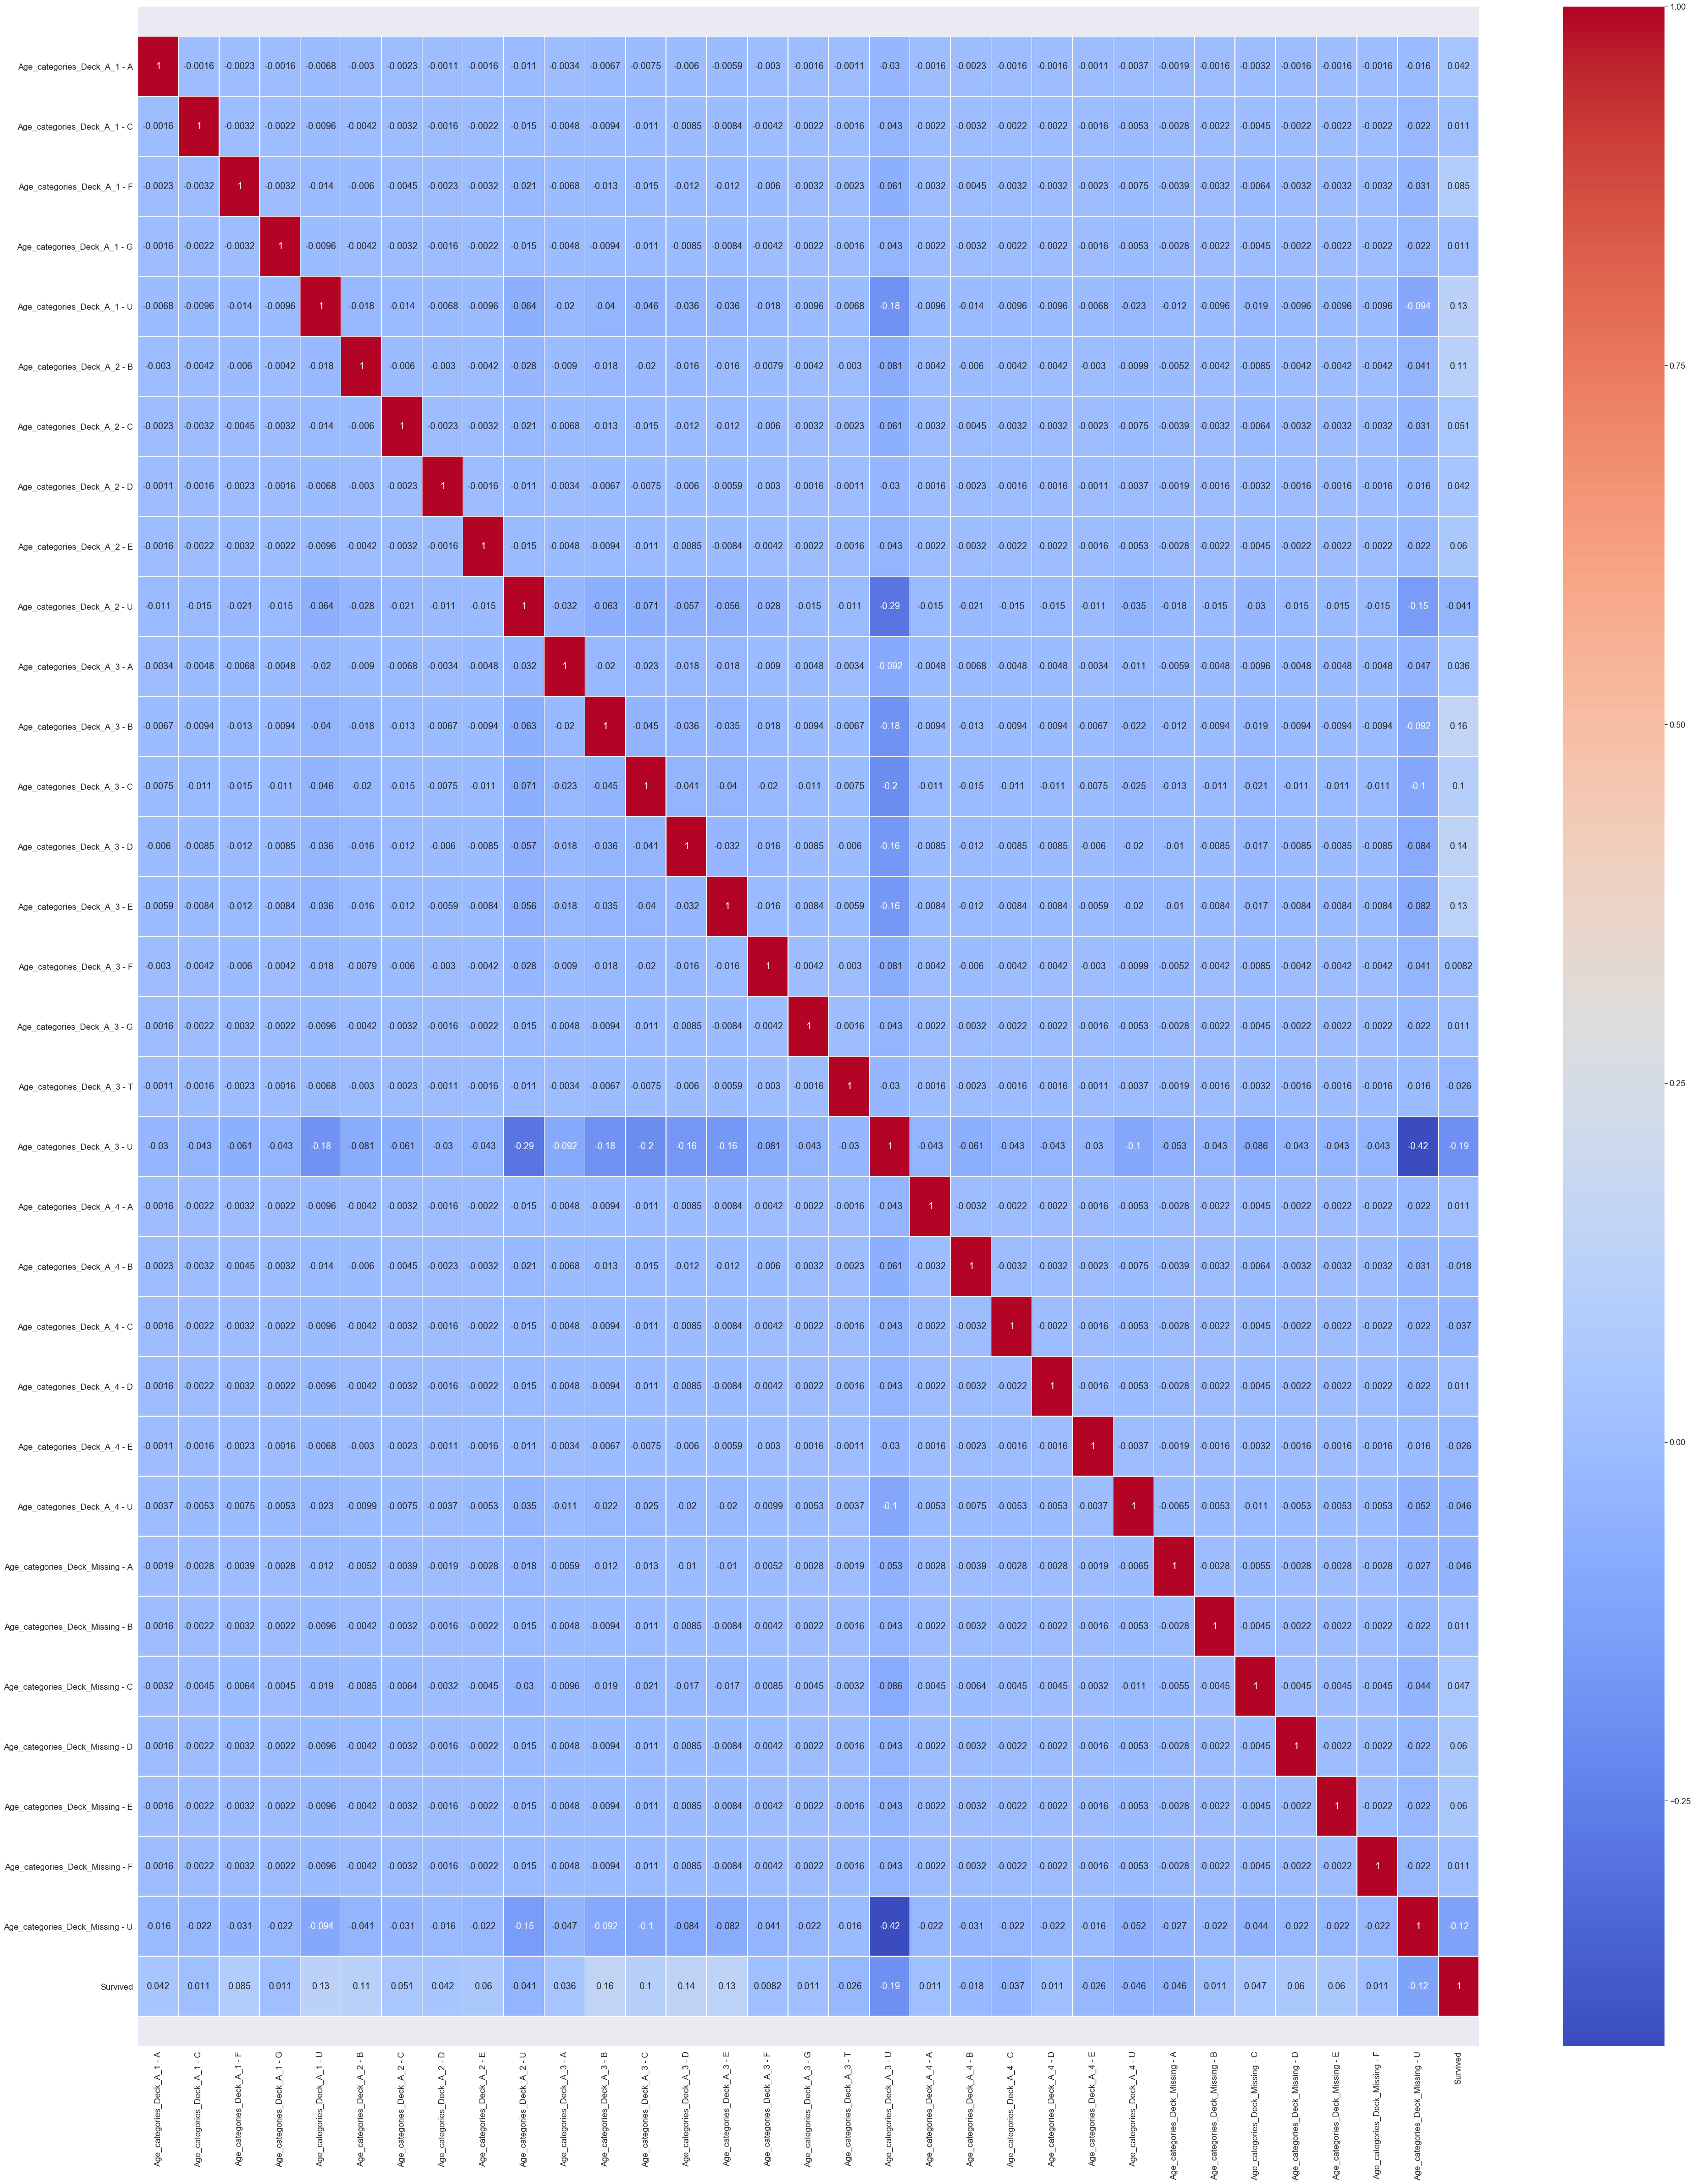

In [51]:
bin_discart('Age_categories_Deck', 60, 50)

Family_categories_2
Family_categories_2_F_0
Family_categories_2_F_1_2
Family_categories_2_F_3
Family_categories_2_F_4_5_6
Family_categories_2_F_7+
Survived


Survived                       1.000000
Family_categories_2_F_1_2      0.238059
Family_categories_2_F_0        0.203367
Family_categories_2_F_3        0.128347
Family_categories_2_F_7+       0.096040
Family_categories_2_F_4_5_6    0.089167
Name: Survived, dtype: float64

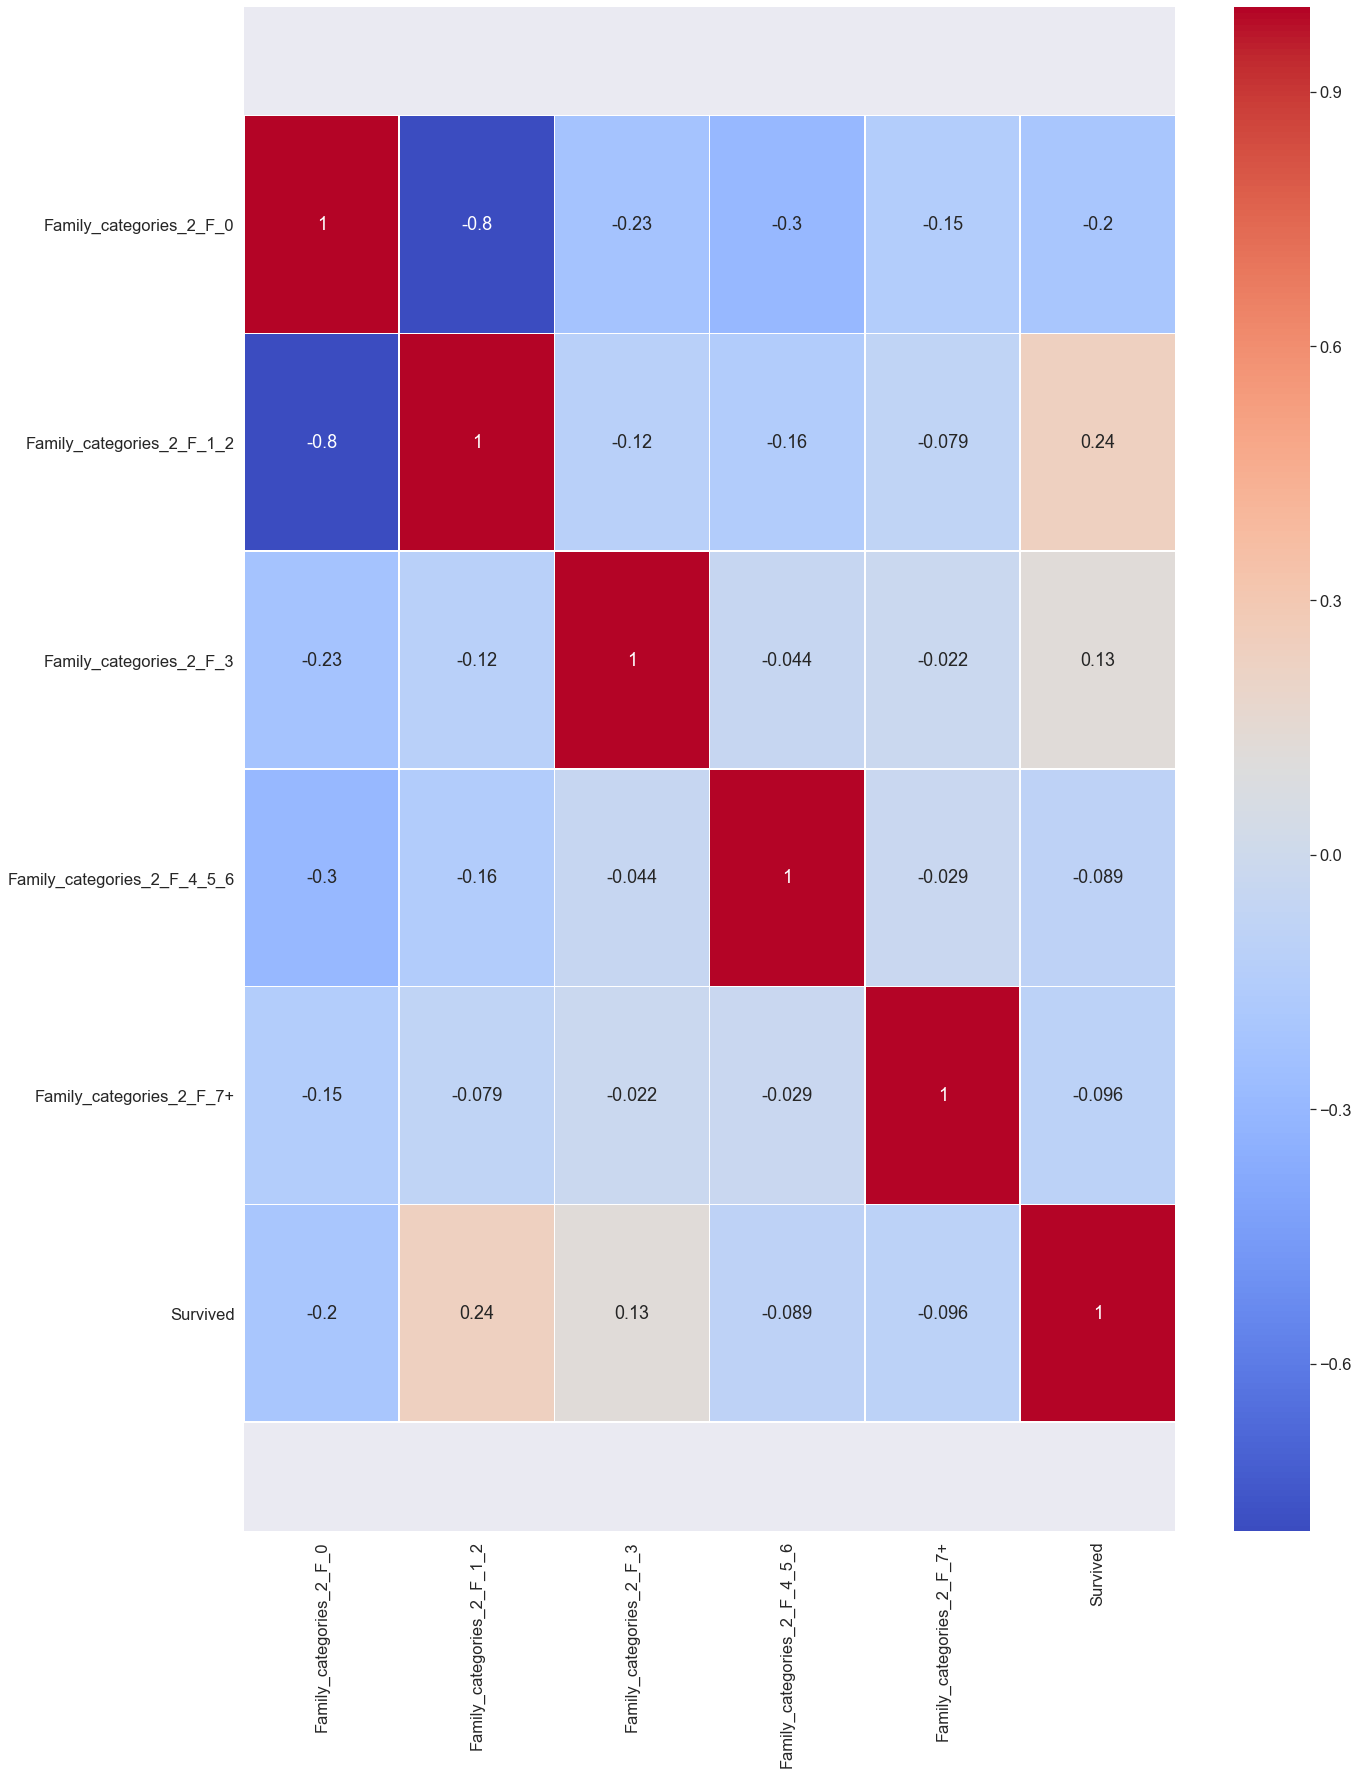

In [52]:
bin_discart('Family_categories_2')

Fare_categories_2
Fare_categories_2_0-12
Fare_categories_2_12-50
Fare_categories_2_50+
Survived


Survived                   1.000000
Fare_categories_2_50+      0.286113
Fare_categories_2_0-12     0.267244
Fare_categories_2_12-50    0.065790
Name: Survived, dtype: float64

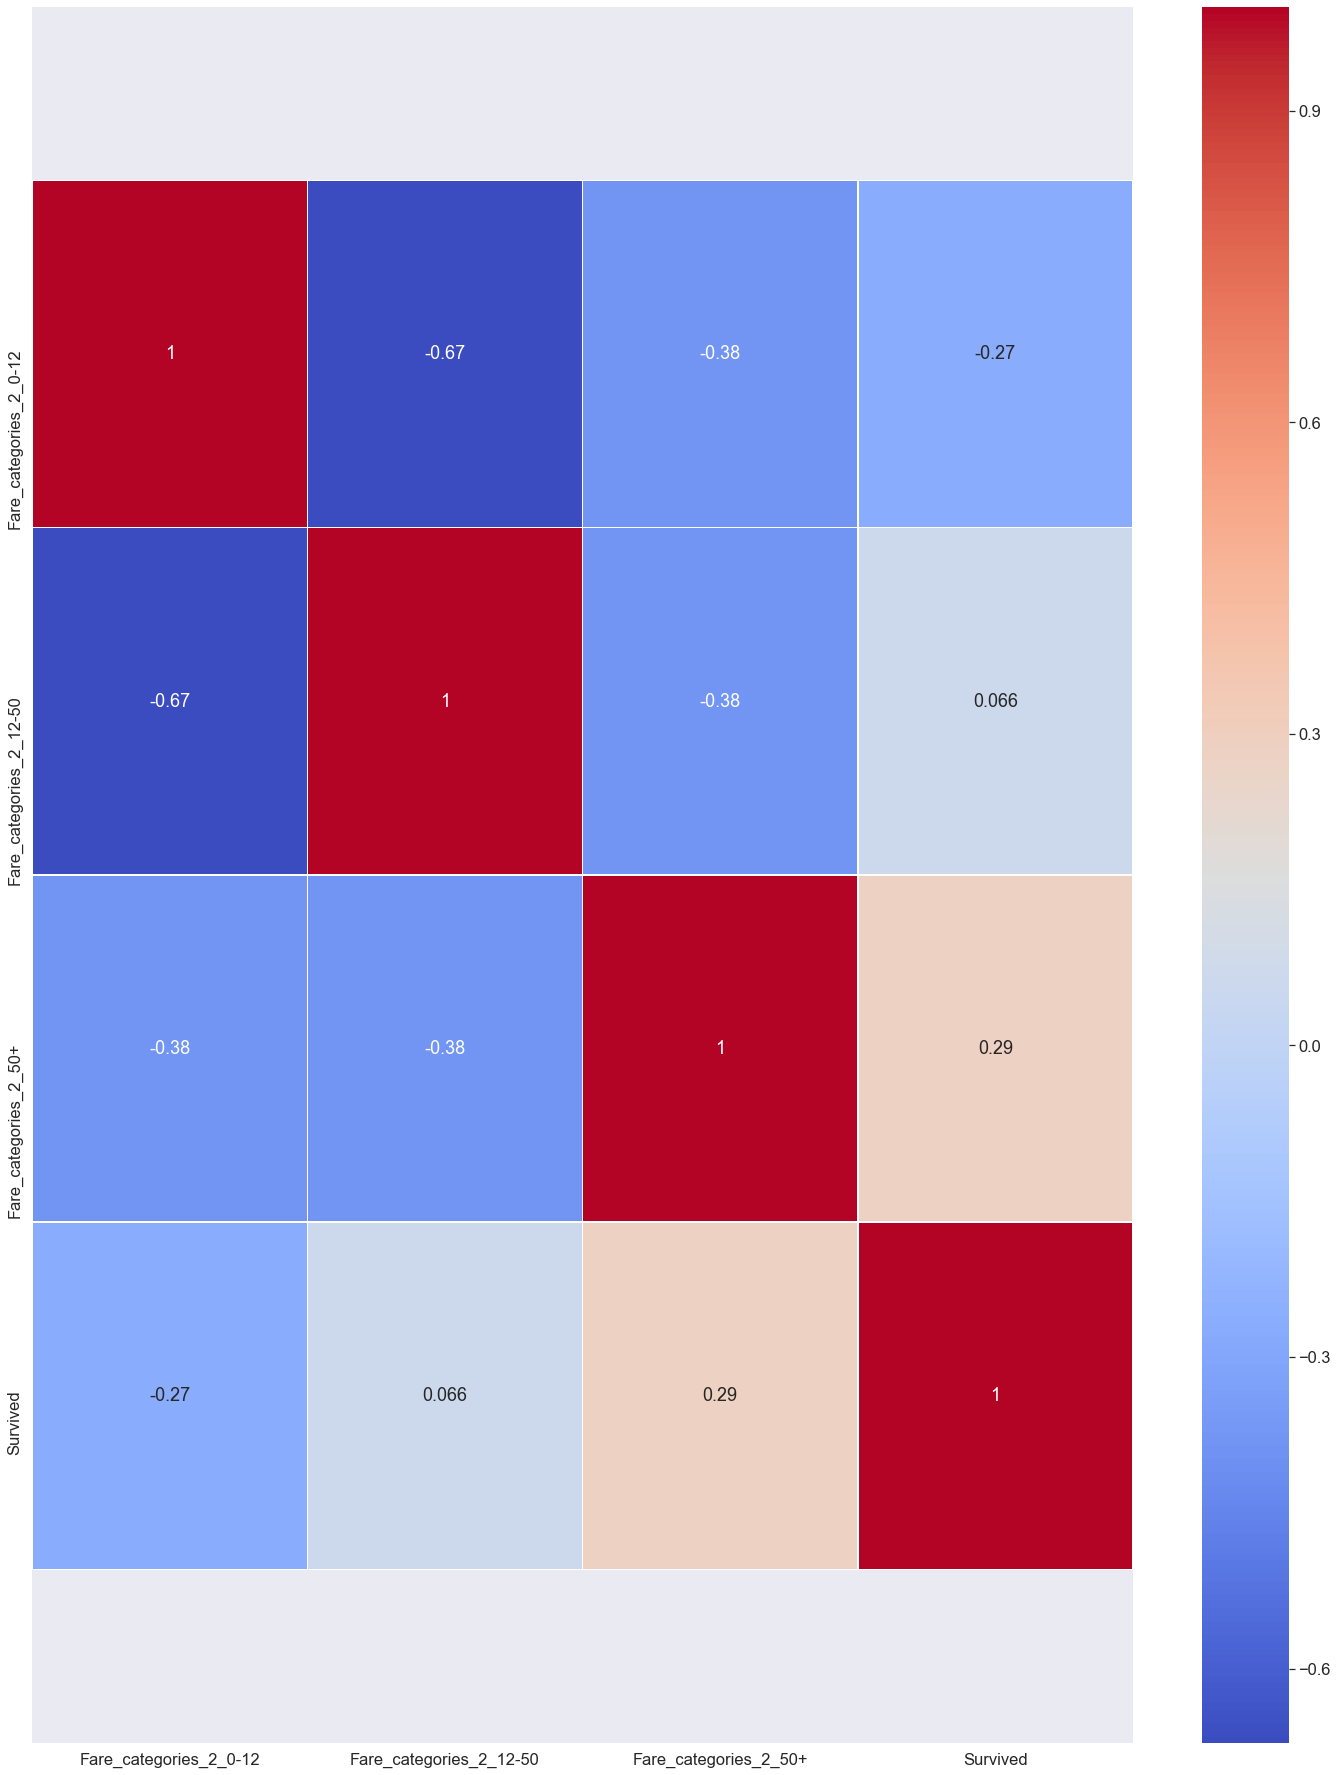

In [53]:
bin_discart('Fare_categories_2')

Embarked
Embarked_C
Embarked_Q
Embarked_S
Survived


Survived      1.000000
Embarked_C    0.168240
Embarked_S    0.149683
Embarked_Q    0.003650
Name: Survived, dtype: float64

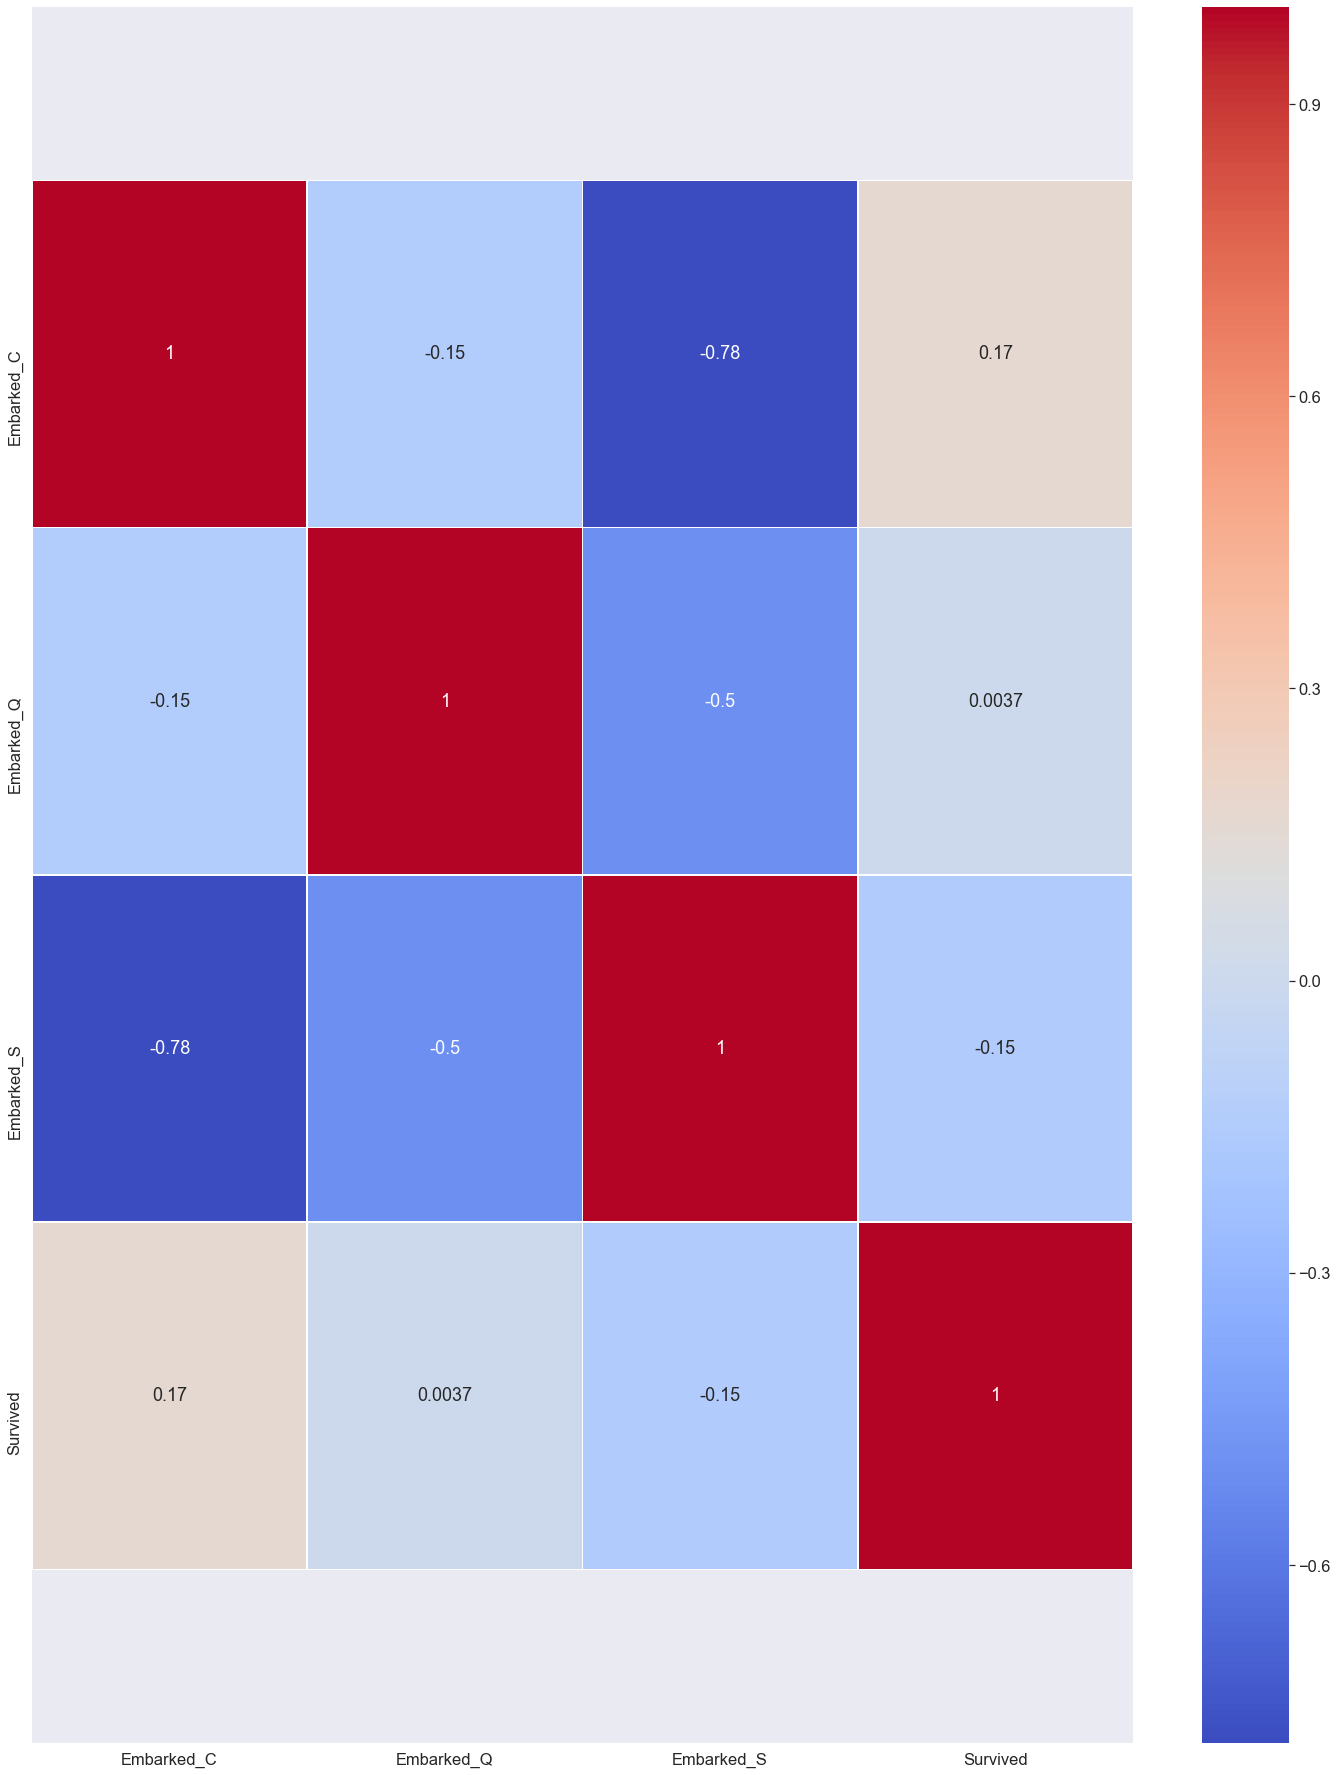

In [54]:
bin_discart('Embarked')

In [55]:
'''
Drops at least one bin from each classification

Sex_female
Pclass_Title_3 - Master_Royalty
Pclass_Title_1 - Officer
Pclass_Title_1 - Mr
Pclass_Title_1 - Master_Royalty
Pclass_Title_2 - Officer
Age_categories_Deck_A_3 - T    (There is only one person in deck T)
Age_categories_Deck_A_1 - F        
Age_categories_Deck_Missing - E   
Age_categories_Deck_Missing - D   
Age_categories_Deck_A_2 - E        
Age_categories_Deck_A_2 - C       
Age_categories_Deck_Missing - C    
Age_categories_Deck_A_4 - U        
Age_categories_Deck_Missing - A   
Age_categories_Deck_A_1 - A        
Age_categories_Deck_A_2 - D       
Age_categories_Deck_A_2 - U        
Age_categories_Deck_A_4 - C        
Age_categories_Deck_A_3 - A        
Age_categories_Deck_A_4 - E        
Age_categories_Deck_A_4 - B        
Age_categories_Deck_Missing - B    
Age_categories_Deck_Missing - F    
Age_categories_Deck_A_4 - D    
Age_categories_Deck_A_1 - G      
Age_categories_Deck_A_1 - C      
Age_categories_Deck_A_3 - G       
Age_categories_Deck_A_4 - A       
Age_categories_Deck_A_3 - F    
Family_categories_2_F_0
Fare_categories_2_12-50
Embarked_S
Embarked_Q
'''
train_Variables_1 = train.drop(['PassengerId', 'Sex_female'
                            ,'Pclass_Title_3 - Master_Royalty'
                            ,'Pclass_Title_1 - Officer'
                            ,'Pclass_Title_1 - Mr'
                            ,'Pclass_Title_1 - Master_Royalty'
                            ,'Pclass_Title_2 - Officer'
                            ,'Age_categories_Deck_A_3 - T'
                            ,'Age_categories_Deck_A_1 - F'        
                            ,'Age_categories_Deck_Missing - E'   
                            ,'Age_categories_Deck_Missing - D'  
                            ,'Age_categories_Deck_A_2 - E'        
                            ,'Age_categories_Deck_A_2 - C'       
                            ,'Age_categories_Deck_Missing - C'    
                            ,'Age_categories_Deck_A_4 - U'        
                            ,'Age_categories_Deck_Missing - A'   
                            ,'Age_categories_Deck_A_1 - A'        
                            ,'Age_categories_Deck_A_2 - D'       
                            ,'Age_categories_Deck_A_2 - U'        
                            ,'Age_categories_Deck_A_4 - C'        
                            ,'Age_categories_Deck_A_3 - A'        
                            ,'Age_categories_Deck_A_4 - E'        
                            ,'Age_categories_Deck_A_4 - B'        
                            ,'Age_categories_Deck_Missing - B'    
                            ,'Age_categories_Deck_Missing - F'    
                            ,'Age_categories_Deck_A_4 - D'    
                            ,'Age_categories_Deck_A_1 - G'      
                            ,'Age_categories_Deck_A_1 - C'      
                            ,'Age_categories_Deck_A_3 - G'       
                            ,'Age_categories_Deck_A_4 - A'       
                            ,'Age_categories_Deck_A_3 - F'    
                            ,'Family_categories_2_F_0'
                            ,'Fare_categories_2_12-50'
                            ,'Embarked_S'
                            ,'Embarked_Q']
                        , axis =1)
train_Variables_1.head()

,Survived,Sex,Pclass_Title,Age_categories_Deck,Family_categories_2,Fare_categories_2,Embarked,Sex_male,Pclass_Title_1 - Mrs_Miss,Pclass_Title_2 - Master_Royalty,Pclass_Title_2 - Mr,Pclass_Title_2 - Mrs_Miss,Pclass_Title_3 - Mr,Pclass_Title_3 - Mrs_Miss,Age_categories_Deck_A_1 - U,Age_categories_Deck_A_2 - B,Age_categories_Deck_A_3 - B,Age_categories_Deck_A_3 - C,Age_categories_Deck_A_3 - D,Age_categories_Deck_A_3 - E,Age_categories_Deck_A_3 - U,Age_categories_Deck_Missing - U,Family_categories_2_F_1_2,Family_categories_2_F_3,Family_categories_2_F_4_5_6,Family_categories_2_F_7+,Fare_categories_2_0-12,Fare_categories_2_50+,Embarked_C
0,0,male,3 - Mr,A_3 - U,F_1_2,0-12,S,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,1,female,1 - Mrs_Miss,A_3 - C,F_1_2,50+,C,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
2,1,female,3 - Mrs_Miss,A_3 - U,F_0,0-12,S,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,female,1 - Mrs_Miss,A_3 - C,F_1_2,50+,S,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,male,3 - Mr,A_3 - U,F_0,0-12,S,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


Survived                           1.000000
Sex_male                           0.543351
Pclass_Title_3 - Mr                0.416123
Pclass_Title_1 - Mrs_Miss          0.404453
Pclass_Title_2 - Mrs_Miss          0.337329
Fare_categories_2_50+              0.286113
Fare_categories_2_0-12             0.267244
Family_categories_2_F_1_2          0.238059
Pclass_Title_2 - Mr                0.205229
Age_categories_Deck_A_3 - U        0.191555
Embarked_C                         0.168240
Age_categories_Deck_A_3 - B        0.155992
Age_categories_Deck_A_3 - D        0.135620
Age_categories_Deck_A_3 - E        0.129734
Family_categories_2_F_3            0.128347
Pclass_Title_2 - Master_Royalty    0.127985
Age_categories_Deck_A_1 - U        0.125517
Age_categories_Deck_Missing - U    0.118709
Age_categories_Deck_A_2 - B        0.112745
Pclass_Title_3 - Mrs_Miss          0.104873
Age_categories_Deck_A_3 - C        0.102244
Family_categories_2_F_7+           0.096040
Family_categories_2_F_4_5_6     

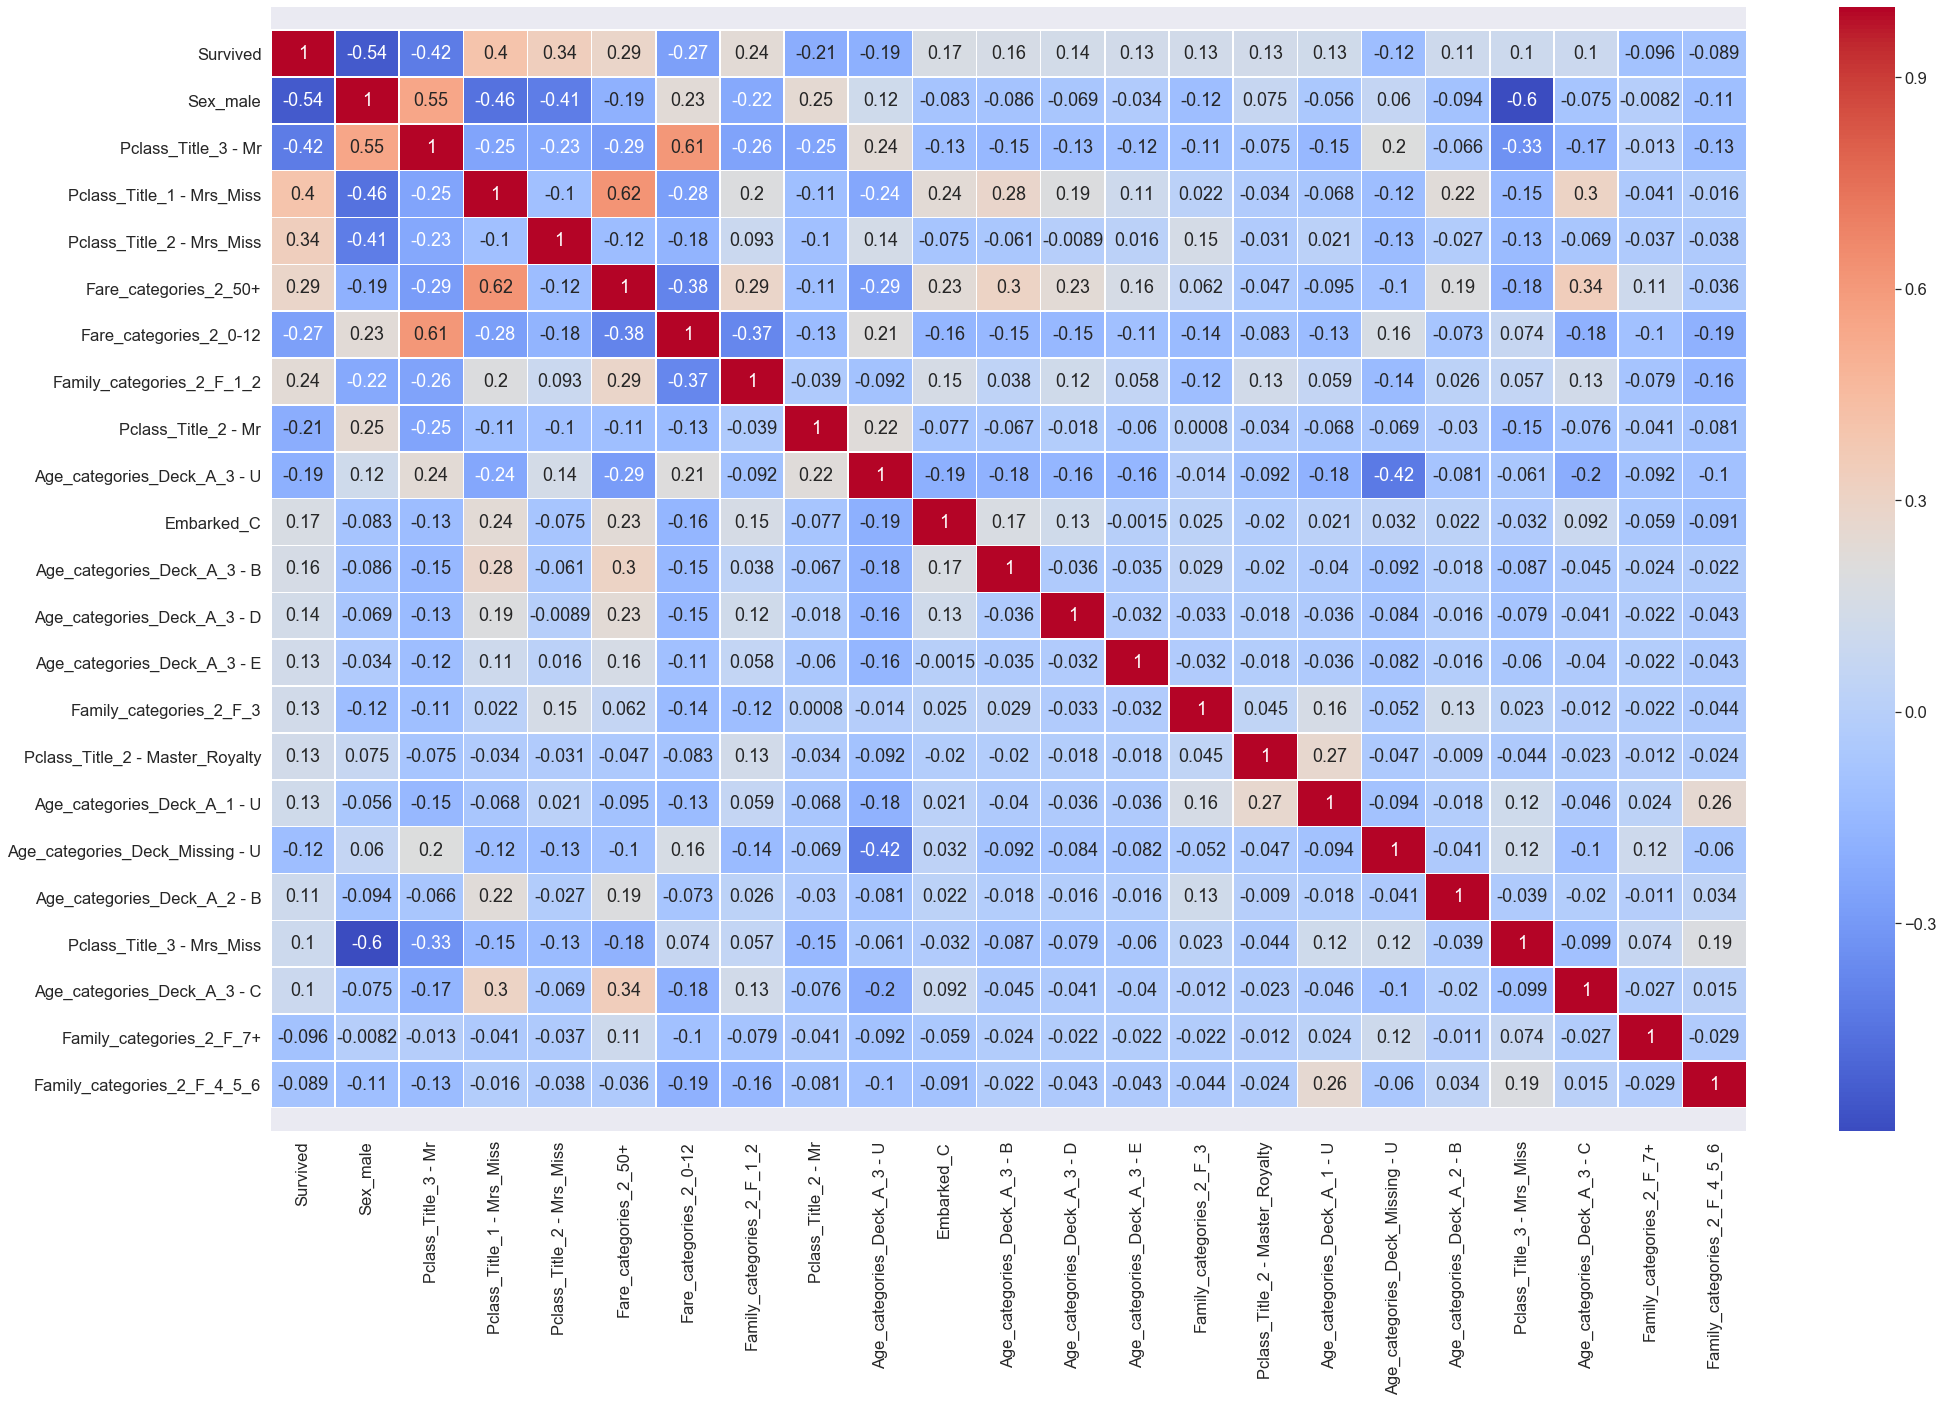

In [56]:
#Verifies correlation.
corrmat = train_Variables_1.corr()
sorted_corrs = corrmat['Survived'].abs().sort_values(ascending = False)
display(sorted_corrs)
#Heatmap
corrmat = train_Variables_1[sorted_corrs.index].corr()
plt.figure(figsize=(30,20))

ax = sns.heatmap(corrmat, annot = True, linewidth = 0.5, cmap='coolwarm')
sns.set(font_scale = 2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.savefig('heatmap_all_variables.png')
plt.show()

In [57]:
'''
Drops 
correlated varibles:
Sex_male 
Fare_categories_2_0-12
Fare_categories_2_50+ 

old variables:
Sex
Pclass_Title_2
Age_categories_Deck
Family_categories_2
Fare_categories_2
Embarked
'''
train_Variables_Model = train_Variables_1.drop(['Sex_male', 'Fare_categories_2_0-12'
                            ,'Fare_categories_2_50+', 'Sex', 'Pclass_Title', 'Age_categories_Deck'
                            ,'Family_categories_2', 'Fare_categories_2', 'Embarked'], axis =1)

In [58]:
#Defines the variables used for modeling.
columns_models = train_Variables_Model.columns
columns_models = columns_models. drop('Survived')
print(*columns_models, sep = '\n')
print("Number of variables used: ", len(columns_models))

Pclass_Title_1 - Mrs_Miss
Pclass_Title_2 - Master_Royalty
Pclass_Title_2 - Mr
Pclass_Title_2 - Mrs_Miss
Pclass_Title_3 - Mr
Pclass_Title_3 - Mrs_Miss
Age_categories_Deck_A_1 - U
Age_categories_Deck_A_2 - B
Age_categories_Deck_A_3 - B
Age_categories_Deck_A_3 - C
Age_categories_Deck_A_3 - D
Age_categories_Deck_A_3 - E
Age_categories_Deck_A_3 - U
Age_categories_Deck_Missing - U
Family_categories_2_F_1_2
Family_categories_2_F_3
Family_categories_2_F_4_5_6
Family_categories_2_F_7+
Embarked_C
Number of variables used:  19


In [59]:
#Modeling
def select_model(df,features):
    
    all_X = df[features]
    all_y = df["Survived"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(random_state = 0),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"],
                    "fit_intercept": [True, False],
                    "class_weight":["balanced", None, {0:2, 1:3}, {0:1, 1:3}]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "DecisionTreeRegressor",
            "estimator": DecisionTreeRegressor(random_state=1),
            "hyperparameters":
                {
                    "criterion": ["mse", "friedman_mse", "mae"],
                    "splitter": ["best", "random"],
                    "max_depth": [7, 9, 10, 15, 20, None],
                    "max_features": ["log2", "sqrt", None]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(n_estimators = 300, random_state=1),
            "hyperparameters":
                {
                    "criterion": ["entropy", "gini"],
                    "max_depth": [10, 15, 20],
                    "max_features": ["log2", "sqrt"]
                }
        },
        {
            "name": "MLPClassifier",
            "estimator": MLPClassifier(alpha = 0.0001, max_iter = 10000, random_state = 1),
            "hyperparameters":
                {
                    "hidden_layer_sizes": [(100,), (19,), (19,1), (19,2), (19,3)],
                    "activation": ["relu", "logistic"],   
                    "solver": ['adam', 'lbfgs'],
                    "learning_rate":  ["constant", "invscaling", "adaptive"]
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train_Variables_Model, columns_models)

LogisticRegression
------------------
Best Score: 0.8193383270911362
Best Parameters: {'class_weight': {0: 2, 1: 3}, 'fit_intercept': True, 'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.8305493133583021
Best Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

DecisionTreeRegressor
---------------------
Best Score: 0.3978197868788954
Best Parameters: {'criterion': 'mse', 'max_depth': 9, 'max_features': None, 'splitter': 'best'}

RandomForestClassifier
----------------------
Best Score: 0.8328214731585518
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2'}

MLPClassifier
-------------
Best Score: 0.8305742821473159
Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (19, 2), 'learning_rate': 'constant', 'solver': 'lbfgs'}



In [60]:
#Logit
model_1 = LogisticRegression(class_weight = {0: 2, 1: 3}, fit_intercept = True, solver = 'newton-cg', random_state = 0)
model_1.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])


holdout_predictions = model_1.predict(holdout[columns_models])

holdout_ids = holdout["PassengerId"]
submission_logit_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_logit = pd.DataFrame(submission_logit_df)

submission_logit.to_csv("submission_logit.csv",index=False)
submission_logit.head()

#Score: 0.77511

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [61]:
#KNeighborsClassifier
model_2= KNeighborsClassifier(algorithm = 'kd_tree', n_neighbors = 9, p = 1, weights = 'distance')
model_2.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])


holdout_predictions = model_2.predict(holdout[columns_models])

holdout_ids = holdout["PassengerId"]
submission_knc_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_knc = pd.DataFrame(submission_knc_df)

submission_knc.to_csv("submission_knc.csv",index=False)
submission_knc.head()

#Score: 0.76076

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [62]:
#DecisionTreeRegressor
model_3 = DecisionTreeRegressor(criterion = 'mse', max_depth = 9, max_features = None, 
                                splitter = 'best', random_state = 1)
model_3.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])

predictions_3 = model_3.predict(holdout[columns_models])

holdout_predictions = []
for i in range(len(predictions_3)):
    if predictions_3[i] < 0.5:
        holdout_predictions.append(0)
    else:
        holdout_predictions.append(1)


holdout_ids = holdout["PassengerId"]
submission_tree_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_tree = pd.DataFrame(submission_tree_df)

submission_tree.to_csv("submission_tree.csv",index=False)
submission_tree.head()

#Score: 0.73205

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [63]:
#RandomForestClassifier
model_4 = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'log2', 
                                 n_estimators = 300, random_state = 1)
model_4.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])

holdout_predictions = model_4.predict(holdout[columns_models])


holdout_ids = holdout["PassengerId"]
submission_rfc_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_rfc = pd.DataFrame(submission_rfc_df)

submission_rfc.to_csv("submission_rfc.csv",index=False)
submission_rfc.head()

#Score: 0.76555

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [65]:
#MLPClassifier
model_5 = MLPClassifier(max_iter = 10000, random_state = 1, activation = 'logistic', alpha = 0.0001, 
                        hidden_layer_sizes = (19, 2), learning_rate = 'constant', solver = 'lbfgs')
model_5.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])

holdout_predictions = model_5.predict(holdout[columns_models])


holdout_ids = holdout["PassengerId"]
submission_MLP_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_MLP = pd.DataFrame(submission_MLP_df)

submission_MLP.to_csv("submission_MLP.csv",index=False)
submission_MLP.head()

#Score: 0.77033

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
